In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

# Read the data
data = pd.read_csv("..\..\Database\mainData.csv")



In [3]:

# Perform STL decomposition
result = seasonal_decompose(data["Num Orders"], model='additive', period=7)

# Extract the components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Combine the components with the original data
data_stl = pd.concat([trend, seasonal, residual], axis=1)
data_stl.columns = ["Trend", "Seasonal", "Residual"]
data_stl = pd.concat([data, data_stl], axis=1)

# Split the data into features and target variable
X = data_stl.drop("Num Orders", axis=1)
y = data_stl["Num Orders"]



In [54]:

# Replace NaN values in X using IterativeImputer
imputer = IterativeImputer(estimator= HistGradientBoostingRegressor(max_iter=100, max_depth=5, min_samples_leaf=5))
X_filled = imputer.fit_transform(ddf)
X_imputed = pd.DataFrame(X_filled, columns=ddf.columns)


R-squared score: 0.9707550319612557


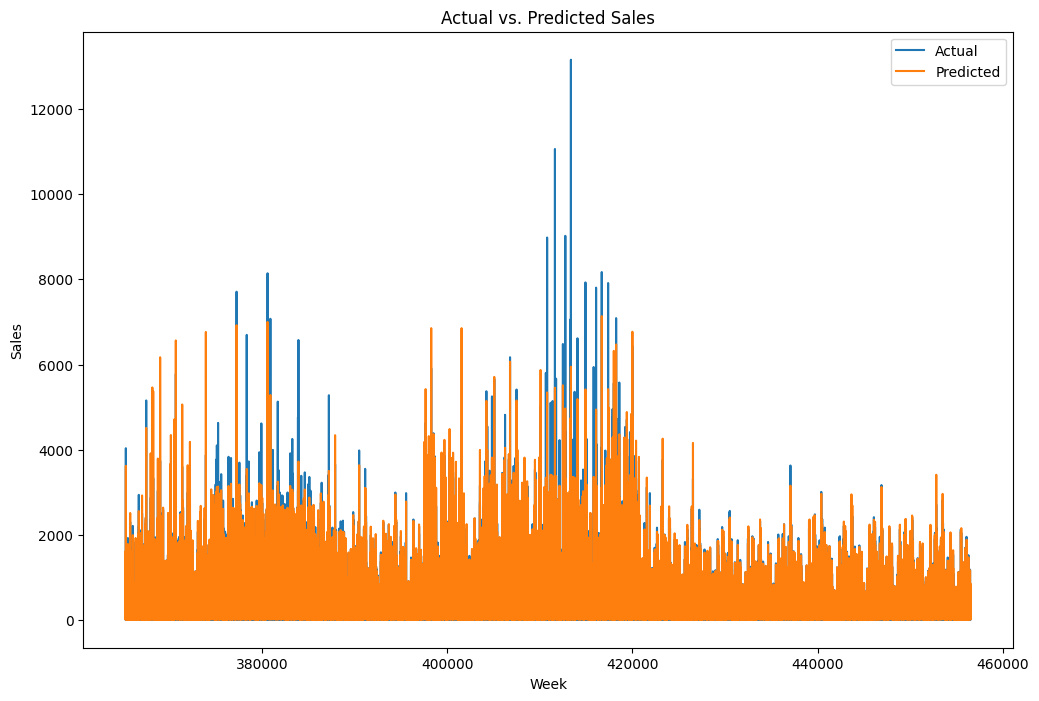

In [5]:


# Create the Random Forest Regressor model with adjusted hyperparameters
model = HistGradientBoostingRegressor(max_iter=100, max_depth=5, min_samples_leaf=5)
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Plot the predicted values against the actual values
plt.figure(figsize=(12, 8))
plt.plot(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted')
plt.xlabel("Week")
plt.ylabel("Sales")
plt.title("Actual vs. Predicted Sales")
plt.legend()
plt.show()


In [6]:
r2 = r2_score(y_train, model.predict(X_train))
print("R-squared score:", r2)

R-squared score: 0.9855129674507538


In [7]:
saleDf = X_test
tempData = saleDf.sample()
tempData, y[y.index == tempData.index[0]]

(         Week  Center Id  Dish Id  Checkout Price  Base Price   
 451903  144.0       50.0   1971.0          328.86      327.86  \
 
         Emailer For Promotion  Homepage Featured  Category  Cuisine   
 451903                    0.0                0.0       4.0      2.0  \
 
         Recipe Id  City Code  Region Code  Center Type  Op Area       Trend   
 451903    47498.0      556.0         77.0          2.0      4.8  166.142857  \
 
         Seasonal   Residual  
 451903  0.876699  89.980444  ,
 451903    257
 Name: Num Orders, dtype: int64)

In [8]:
no1 = int(model.predict(tempData)[0])
print("We have Predicted ",no1," orders using ",model," algorithm for the dish id ",list(tempData["Dish Id"])[0])

We have Predicted  249  orders using  HistGradientBoostingRegressor(max_depth=5, min_samples_leaf=5)  algorithm for the dish id  1971.0


In [9]:
model = HistGradientBoostingRegressor(max_iter=100, max_depth=5, min_samples_leaf=5)

In [10]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(model, X, Y, cv = 5)
mean_acc = cv_score.mean()
mean_acc

NameError: name 'Y' is not defined

In [ ]:
d = tempData.iloc[:,:7]

In [56]:
data = pd.read_csv("..\..\Database\mainData.csv")

In [57]:
data

Week  Center Id  Dish Id  Checkout Price  Base Price   
0          1         55     1885          136.83      152.29  \
1          1         55     1993          136.83      135.83   
2          1         55     2539          134.86      135.86   
3          1         55     2139          339.50      437.53   
4          1         55     2631          243.50      242.50   
...      ...        ...      ...             ...         ...   
456543   145         61     1543          484.09      484.09   
456544   145         61     2304          482.09      482.09   
456545   145         61     2664          237.68      321.07   
456546   145         61     2569          243.50      313.34   
456547   145         61     2490          292.03      290.03   

        Emailer For Promotion  Homepage Featured  Num Orders  Category   
0                           0                  0         177         0  \
1                           0                  0         270         0   
2                           0                  0         189         0   
3                           0                  0          54         0   
4                           0                  0          40         0   
...                       ...                ...         ...       ...   
456543                      0                  0          68        10   
456544                      0                  0          42        10   
456545                      0                  0         501        12   
456546                      0                  0         729        12   
456547                      0                  0         162        12   

        Cuisine  Recipe Id  City Code  Region Code  Center Type  Op Area  
0             0       2614        647           56            0      2.0  
1             0       4690        647           56            0      2.0  
2             0      12872        647           56            0      2.0  
3             1      68358        647           56            0      2.0  
4             1       2620        647           56            0      2.0  
...         ...        ...        ...          ...          ...      ...  
456543        1      10136        473           77            2      4.5  
456544        1       3869        473           77            2      4.5  
456545        2     100036        473           77            2      4.5  
456546        2      10149        473           77            2      4.5  
456547        2       3925        473           77            2      4.5  

[456548 rows x 15 columns]

In [82]:
X = data.drop("Num Orders", axis=1)
Y = data["Num Orders"]
X_train, X_t, Y_train, Y_t = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=False)
gb, hgb, rf = trainModel(X_train, Y_train)

In [93]:
data_stl = stlDecomposition(data, "Num Orders", period=7)
X = data_stl.drop("Num Orders", axis=1)
Y = data_stl["Num Orders"]
X_imputed = performImputation(X)
X_train, X_te, Y_train, Y_te = train_test_split(X_imputed, Y, test_size=0.2, random_state=42, shuffle=False)
gb, hgb, rf = trainModel(X_train, Y_train)

In [83]:
m1 = RandomForestRegressor()
m1.fit(X_train,Y_train)
m1.score(X_t,Y_t)

0.7306984526752557

In [62]:
m2 = GradientBoostingRegressor()
m2.fit(X_train,Y_train)
m2.score(X_test,Y_test)

0.5991797166313121

In [63]:
m3 = HistGradientBoostingRegressor()
m3.fit(X_train,Y_train)
m3.score(X_test,Y_test)

0.732329354905739

In [75]:
m4 = RandomForestRegressor(n_estimators=27)
m4.fit(X_train,Y_train)
m4.score(X_test,Y_test)

0.7310345207584645

In [90]:
m5 = GradientBoostingRegressor(max_depth=5, min_samples_leaf=5)
m5.fit(X_train,Y_train)
m5.score(X_t,Y_t)

0.7004526714151098

In [89]:
m6 = HistGradientBoostingRegressor(max_iter= 600, max_leaf_nodes= 250)
m6.fit(X_train,Y_train)
m6.score(X_t,Y_t)

0.7640473969278314

Graph generated using the  HistGradientBoostingRegressor(max_iter=600, max_leaf_nodes=250)


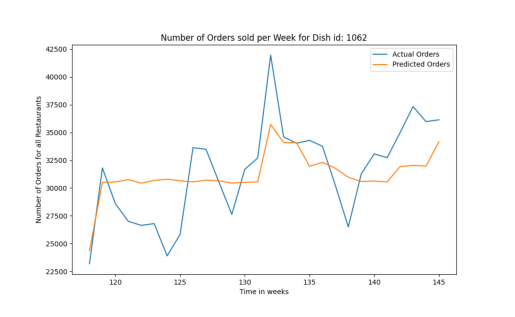

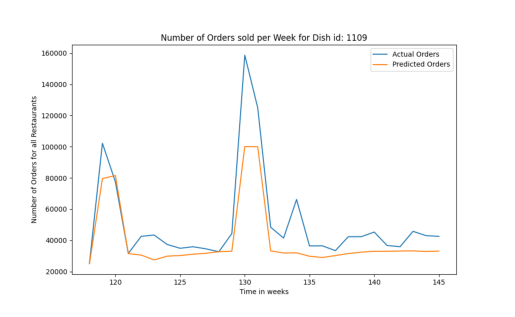

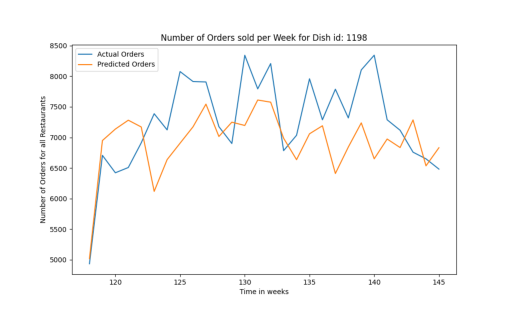

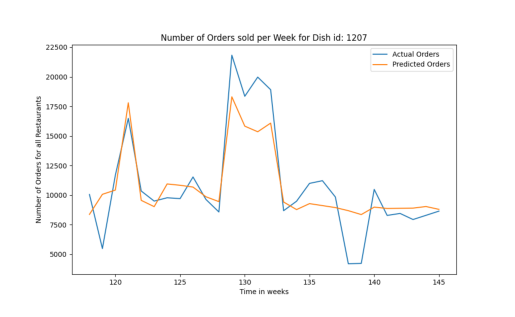

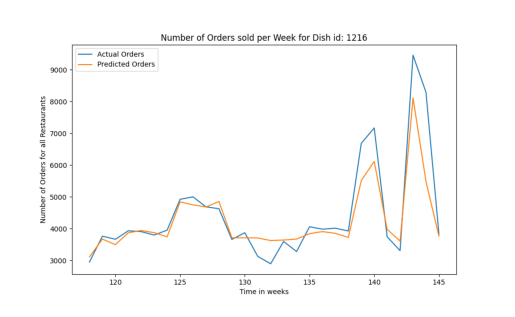

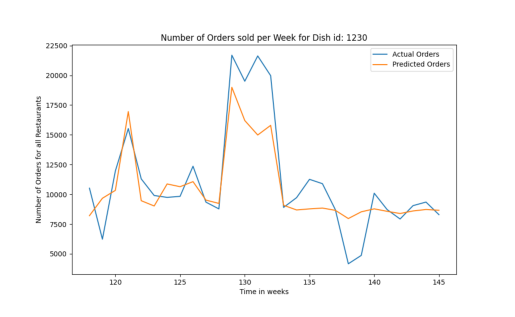

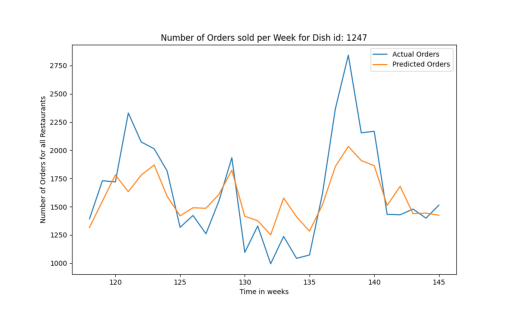

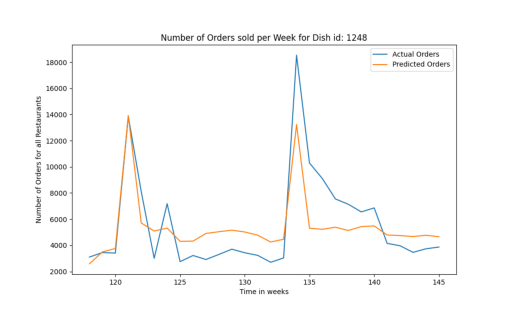

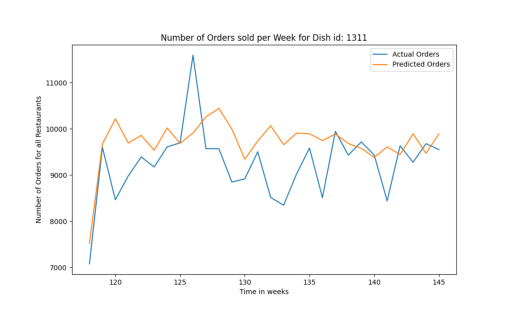

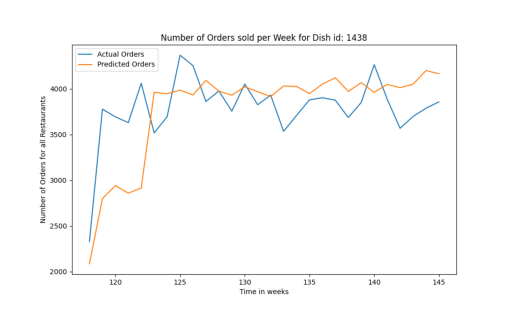

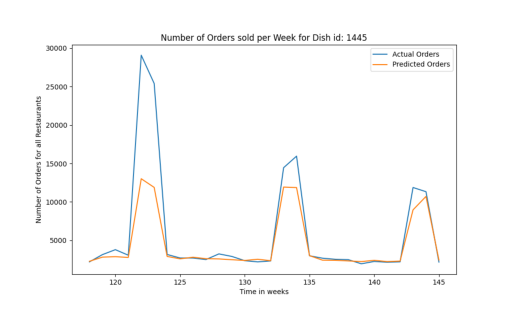

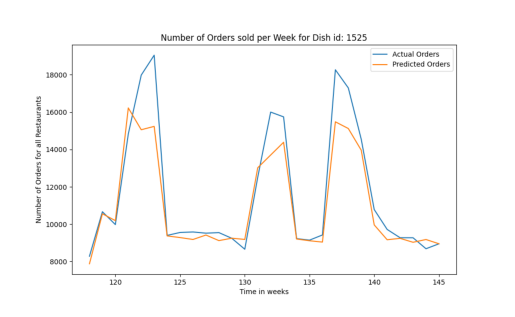

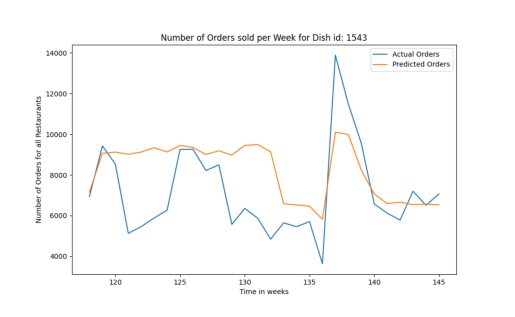

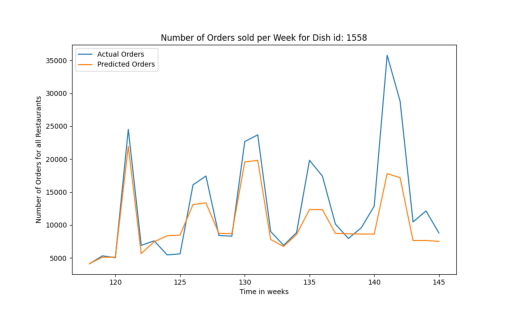

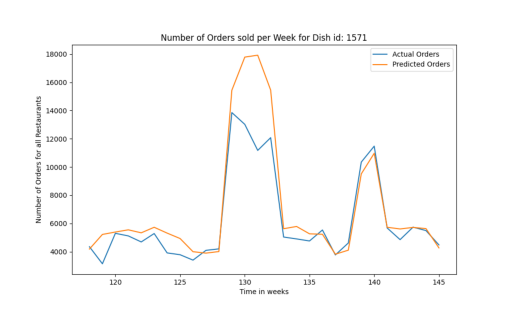

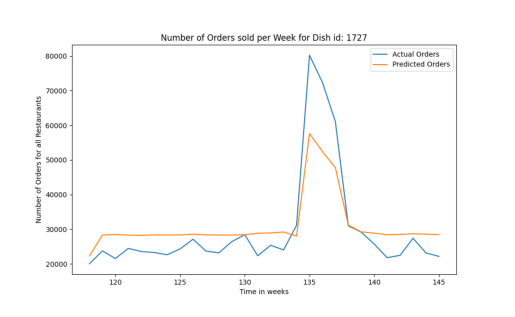

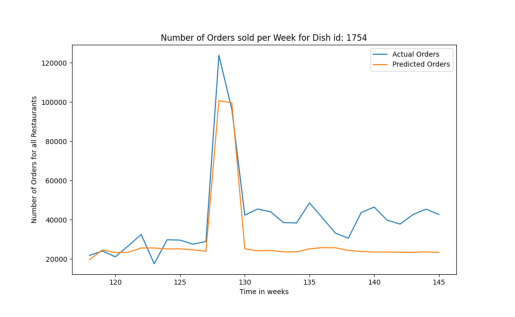

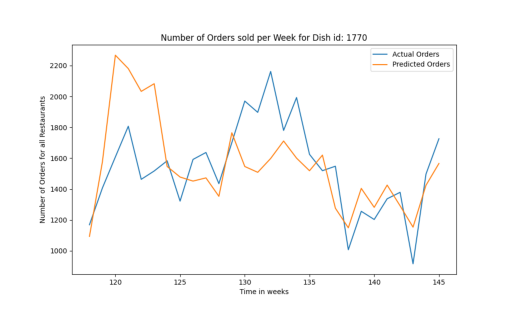

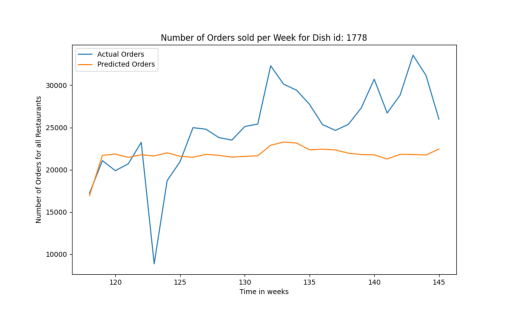

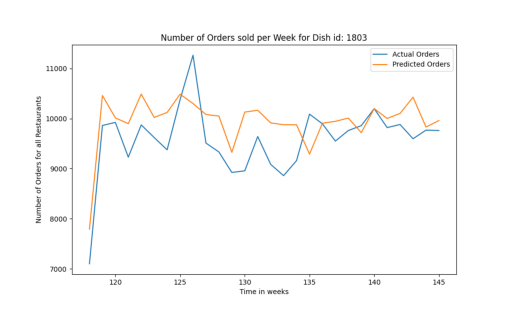

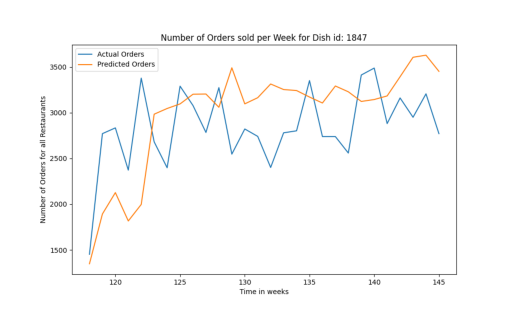

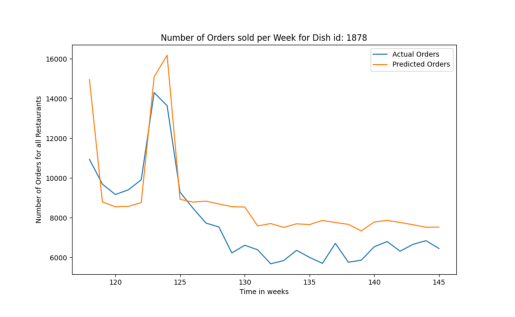

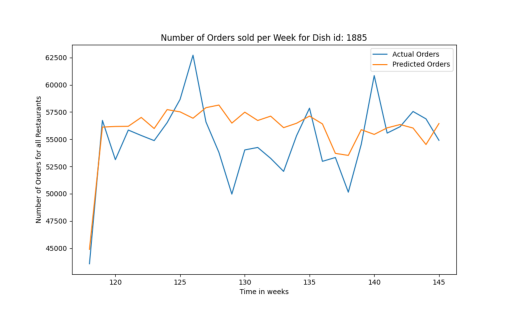

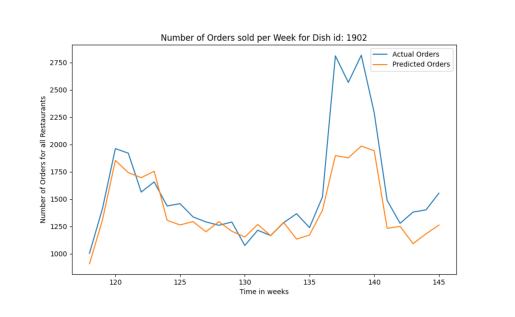

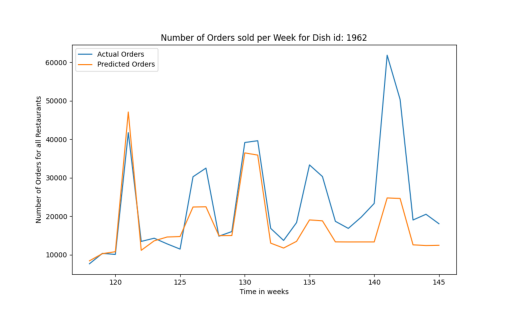

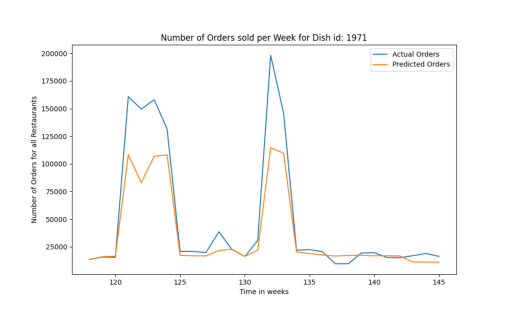

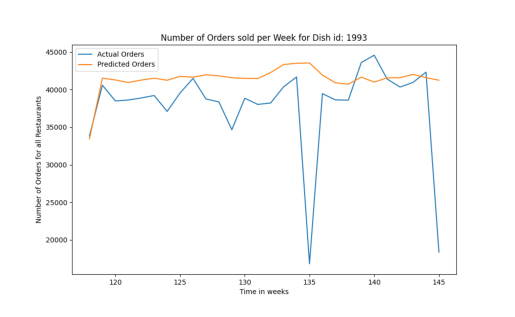

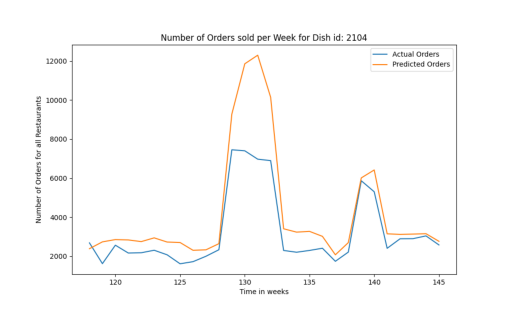

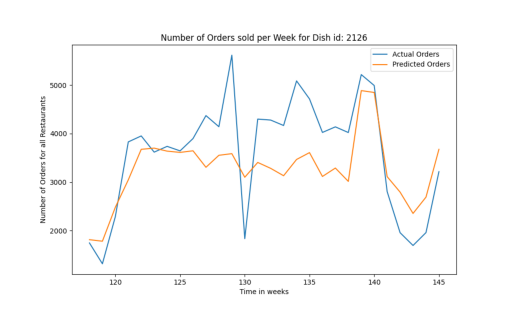

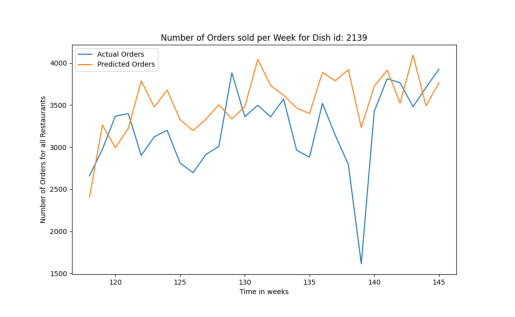

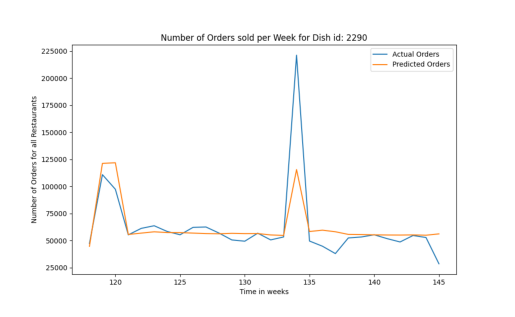

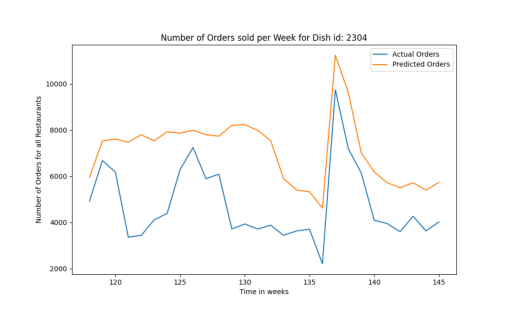

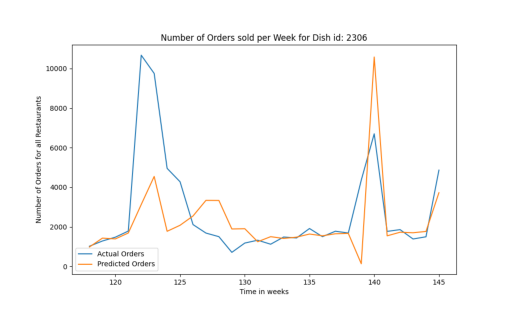

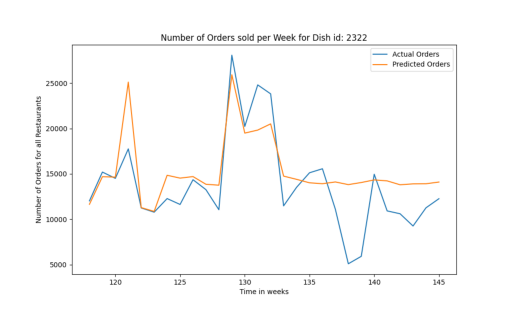

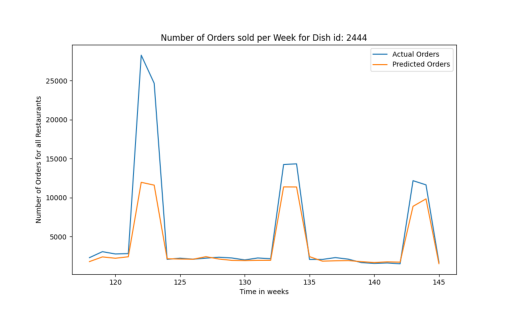

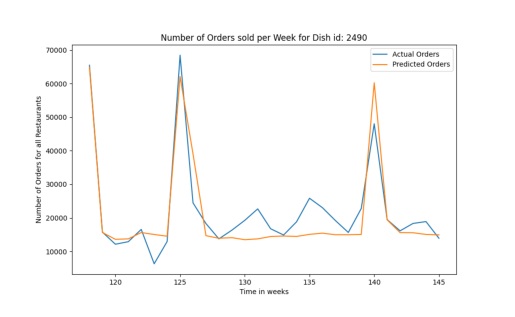

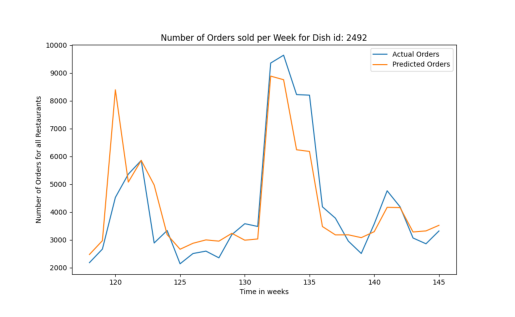

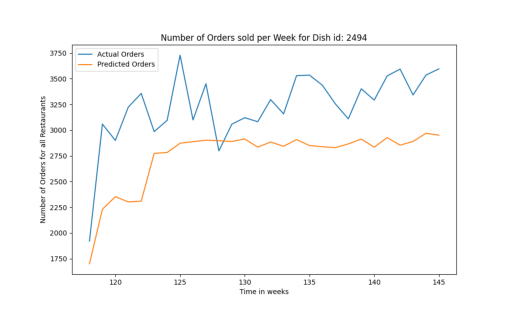

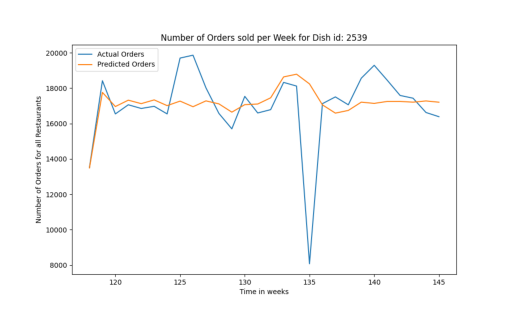

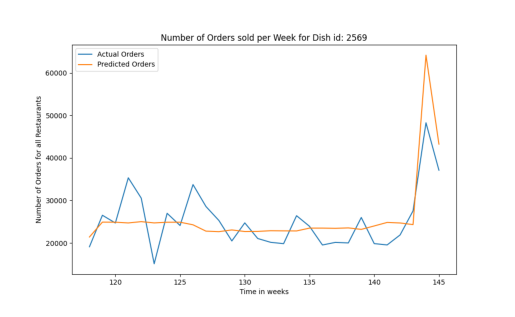

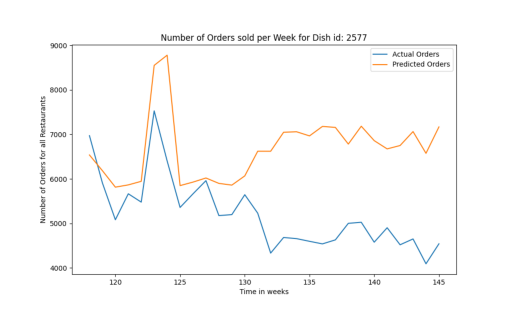

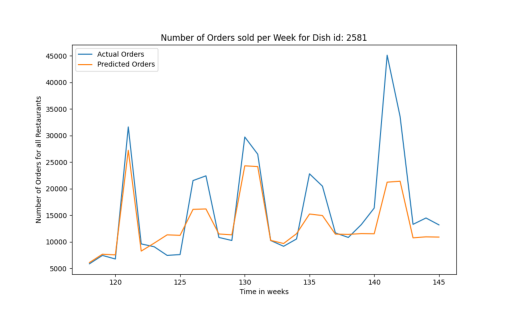

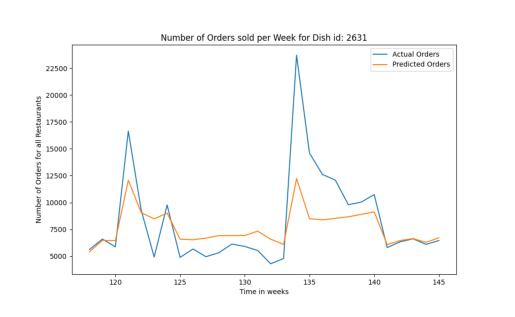

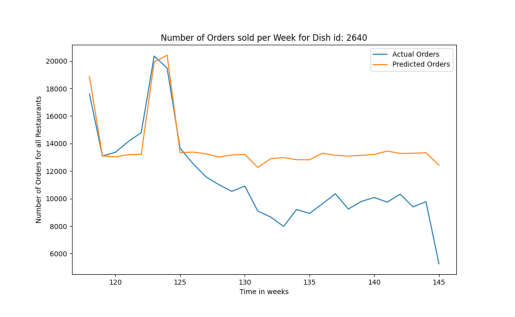

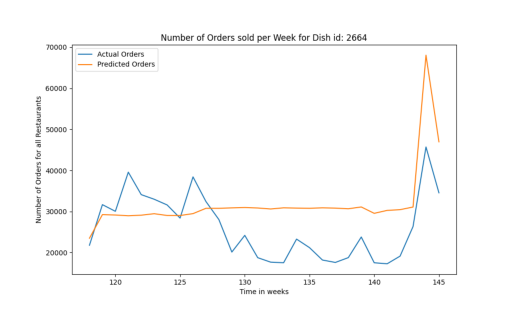

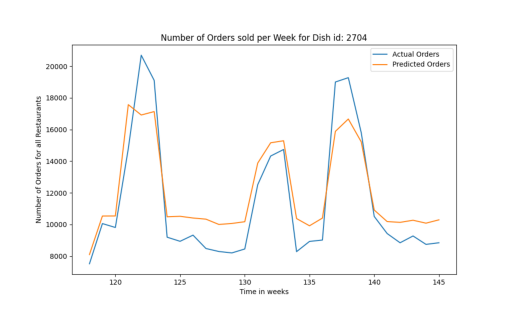

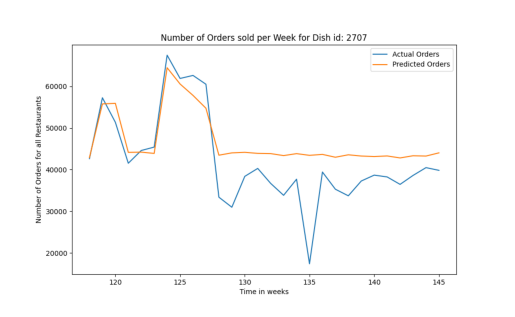

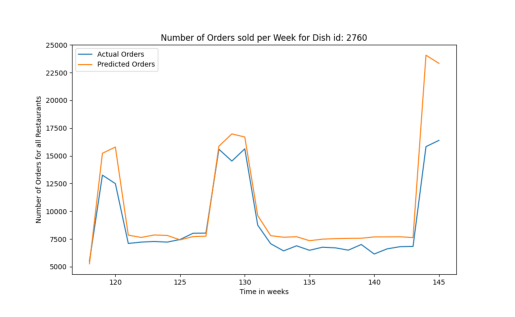

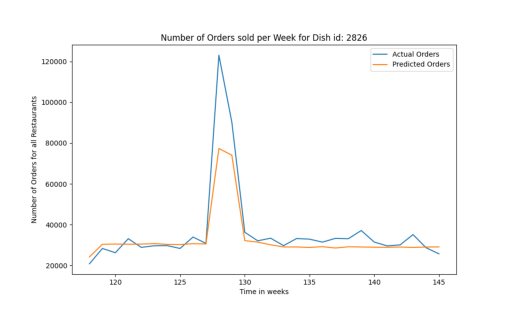

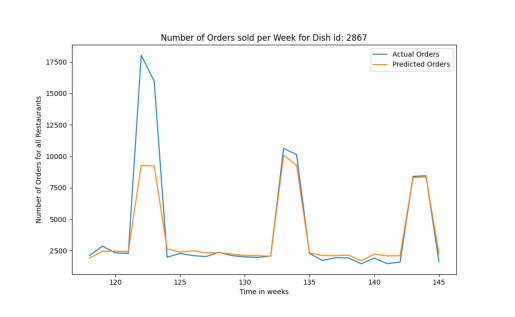

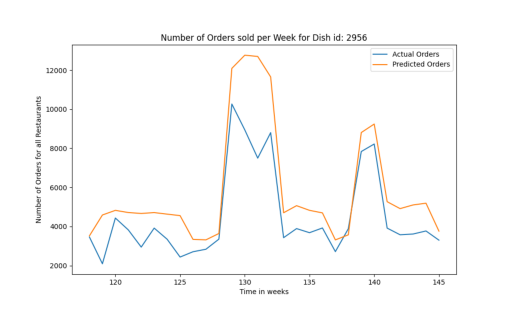


******************************************************

Graph generated using the  GradientBoostingRegressor(max_depth=5, min_samples_leaf=5)


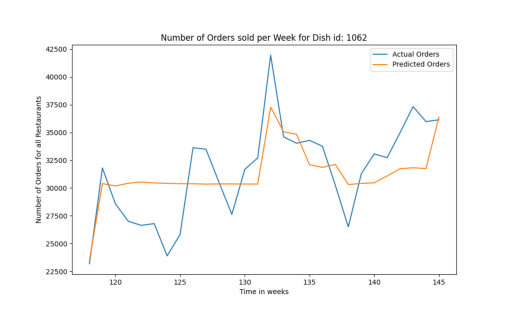

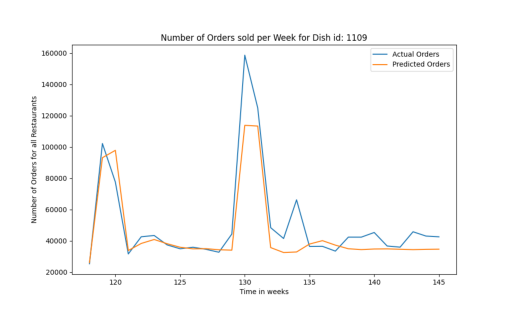

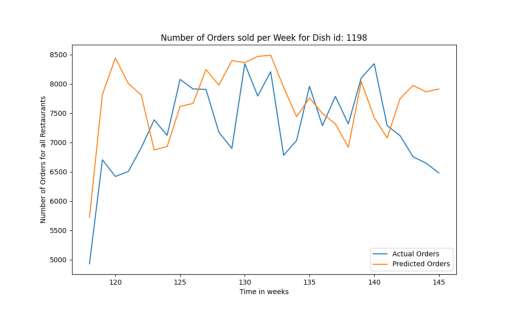

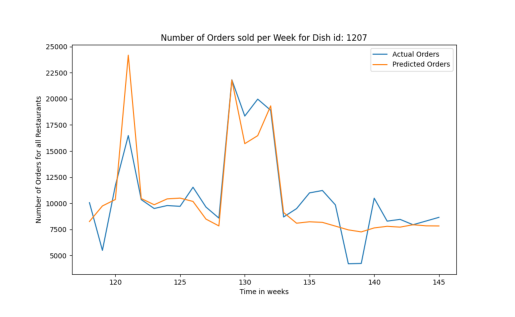

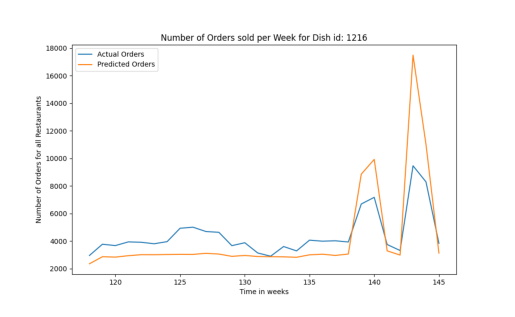

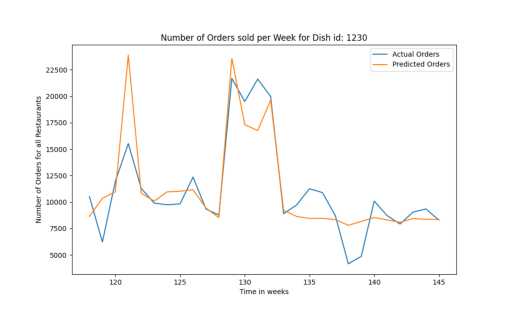

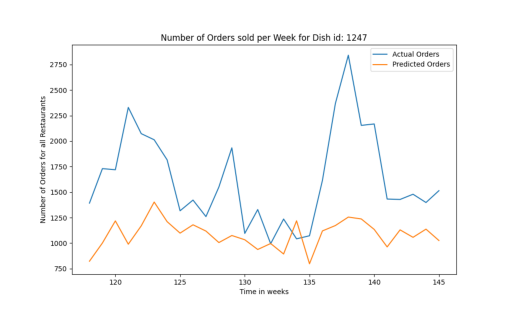

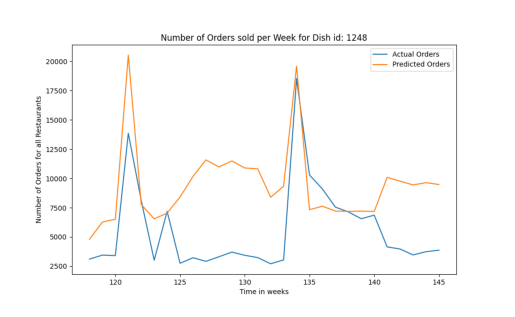

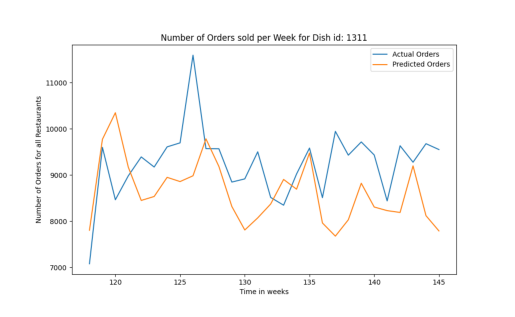

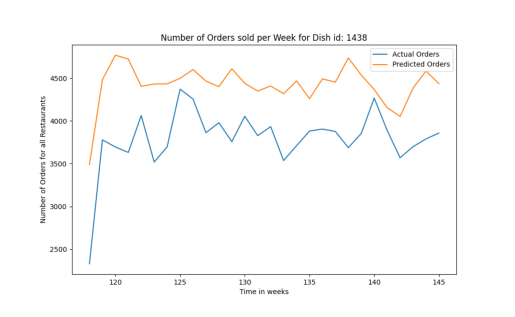

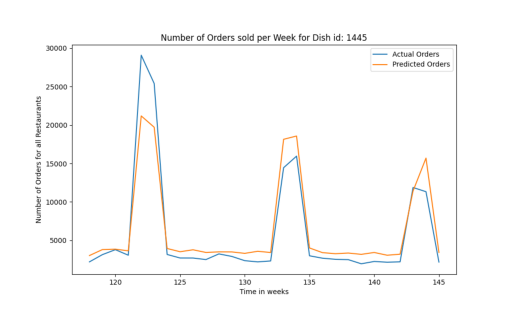

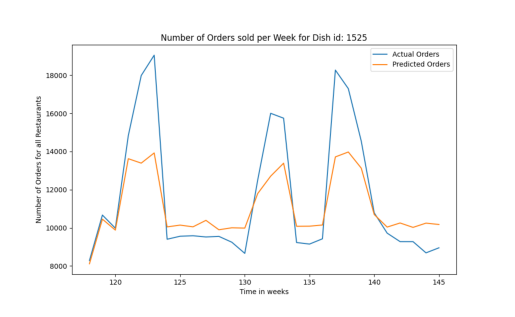

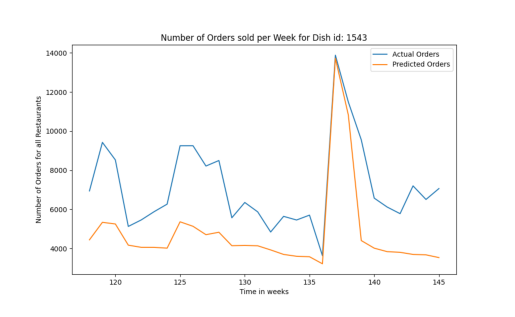

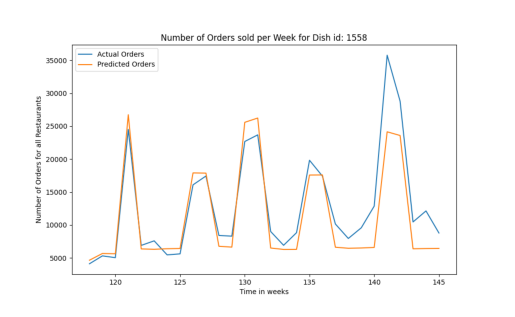

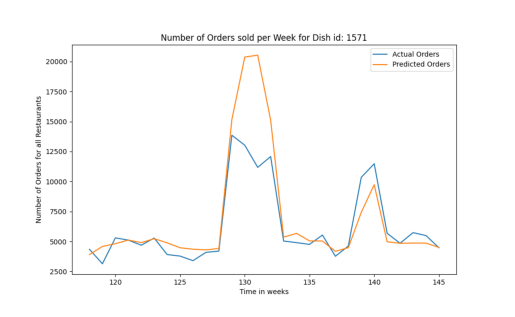

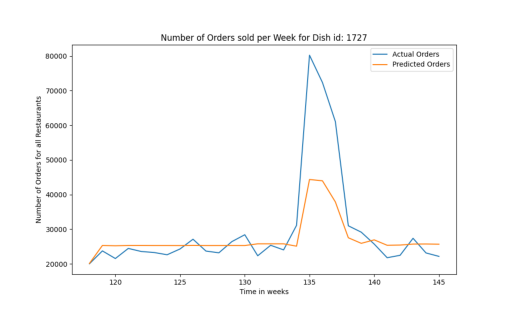

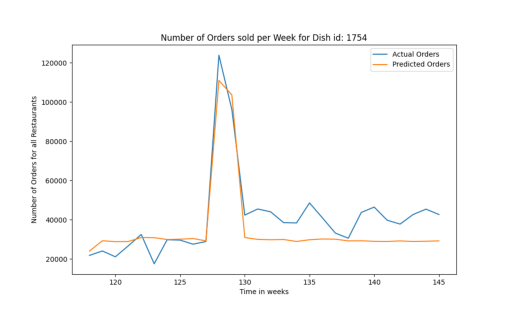

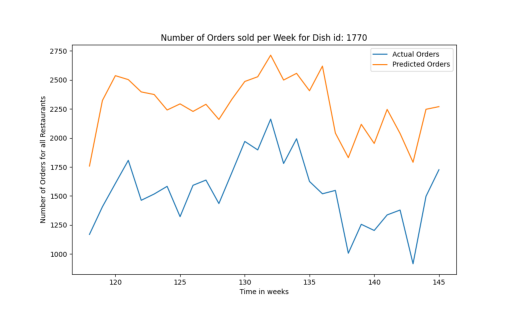

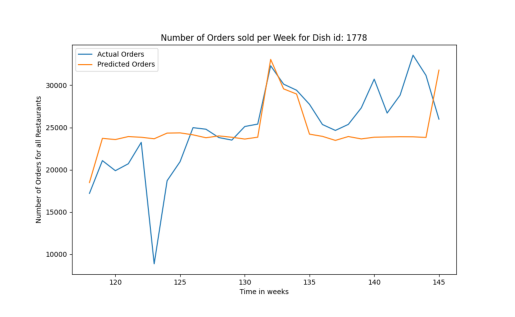

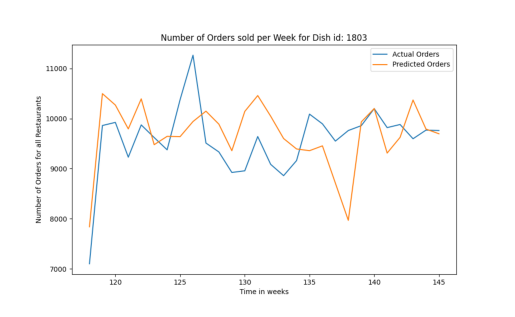

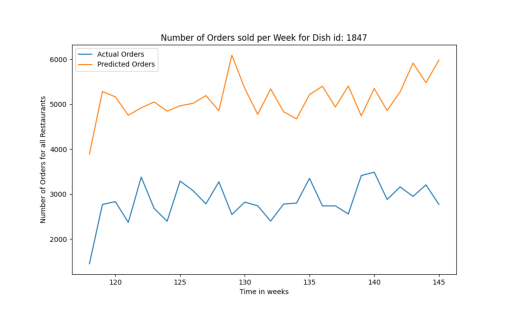

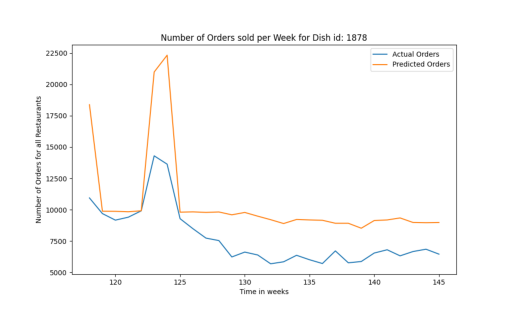

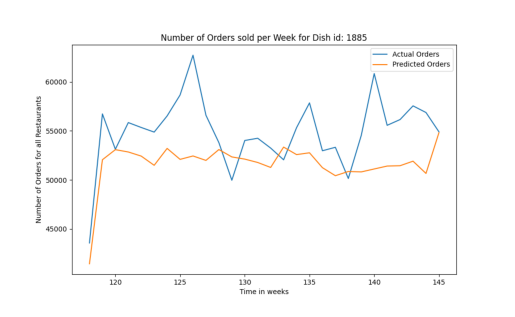

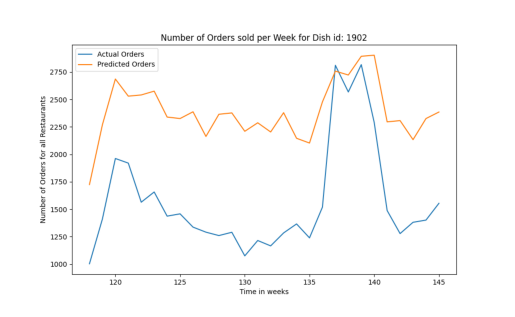

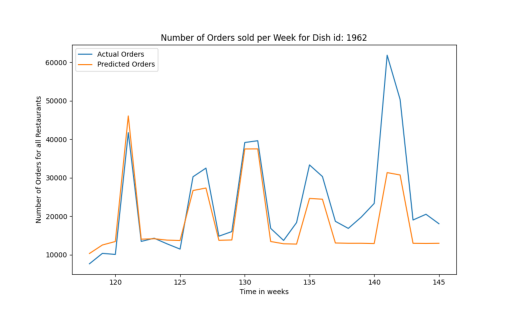

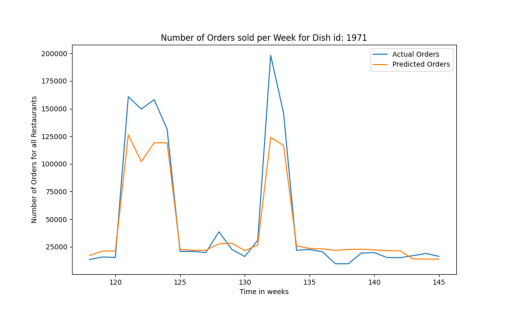

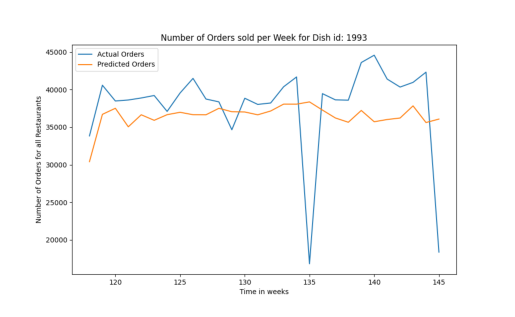

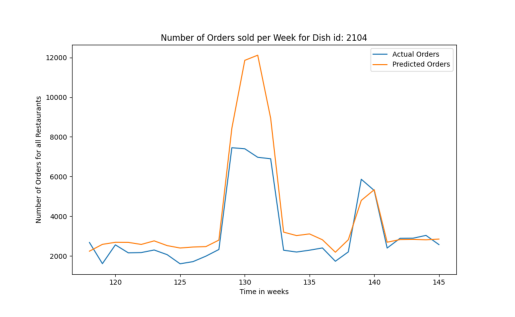

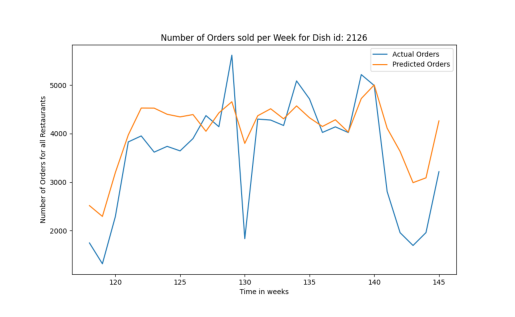

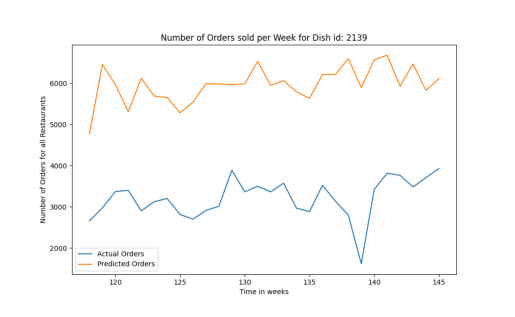

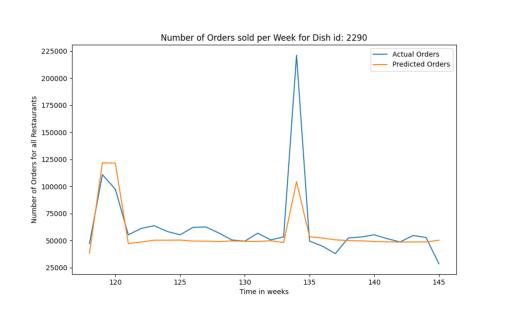

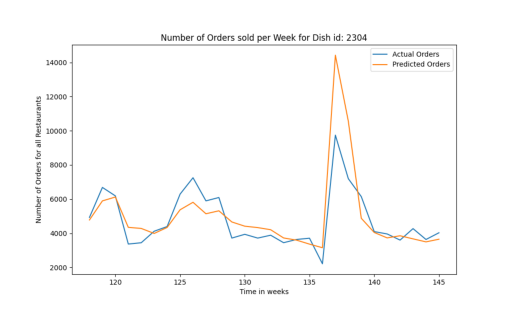

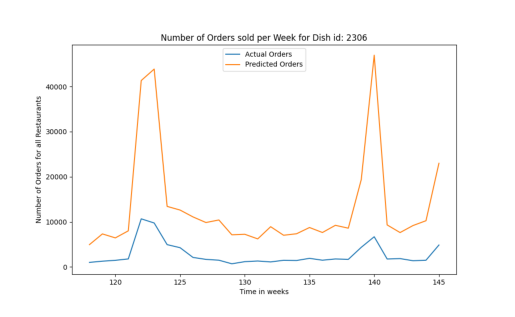

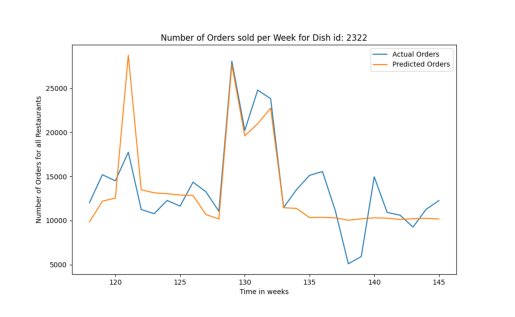

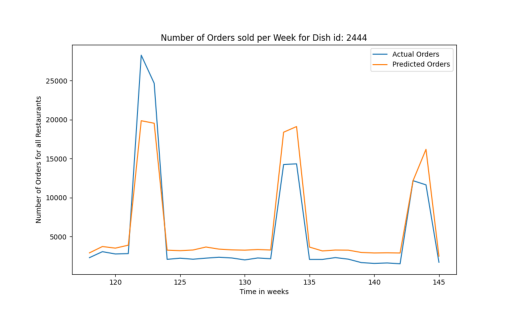

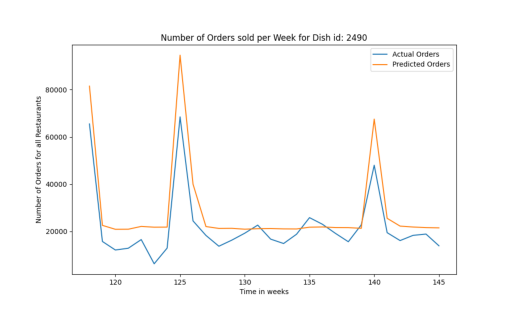

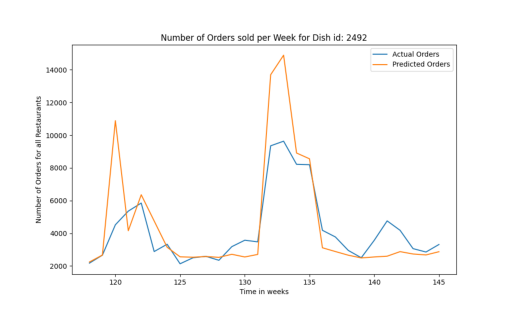

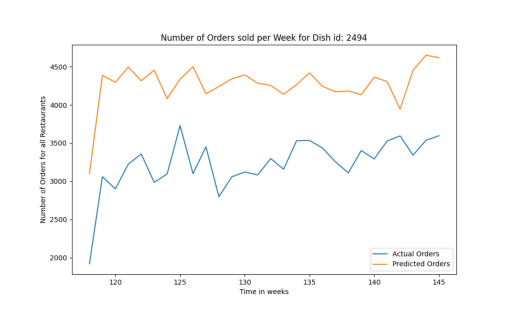

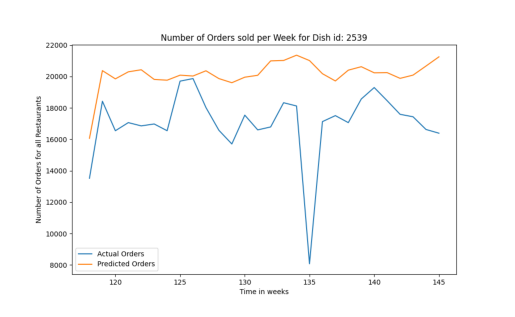

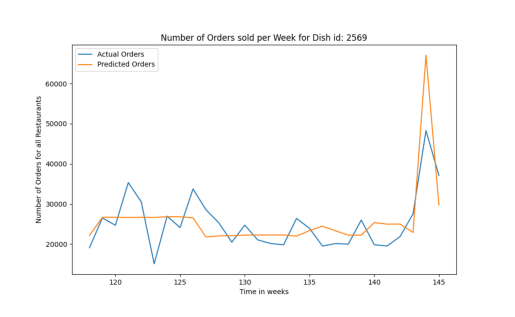

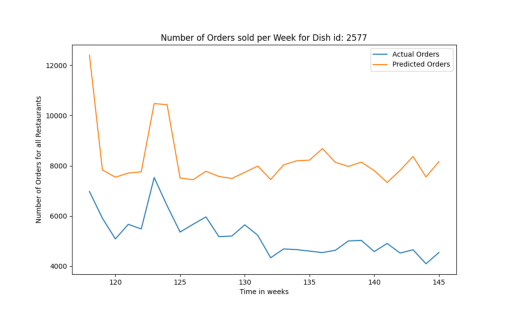

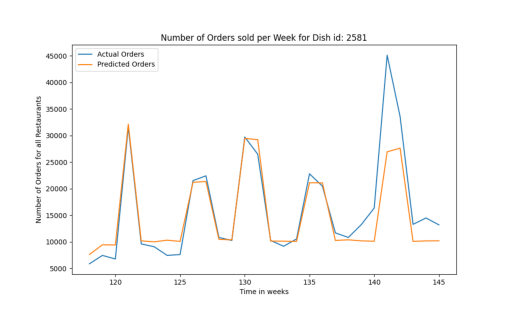

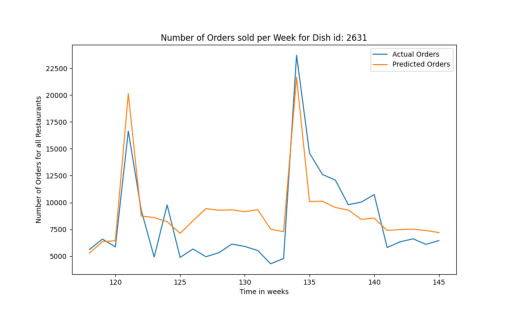

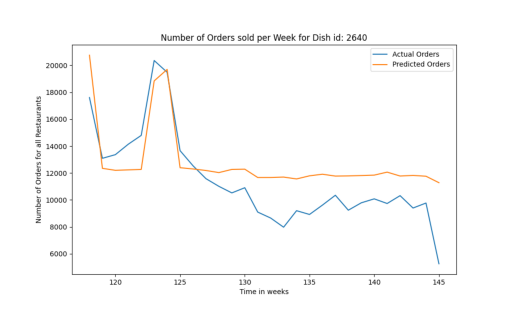

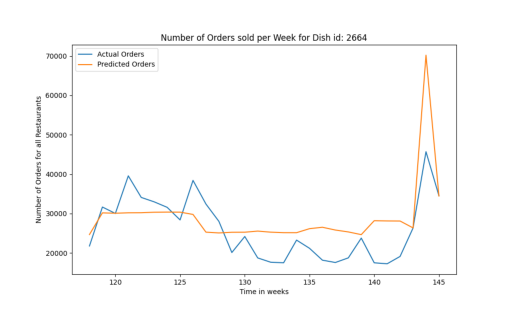

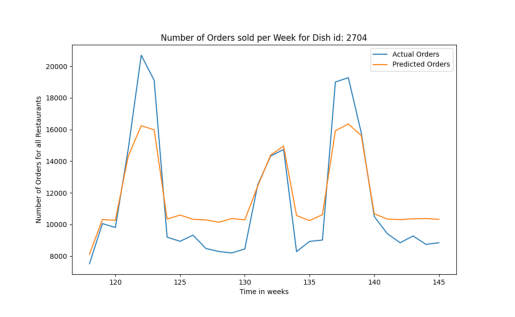

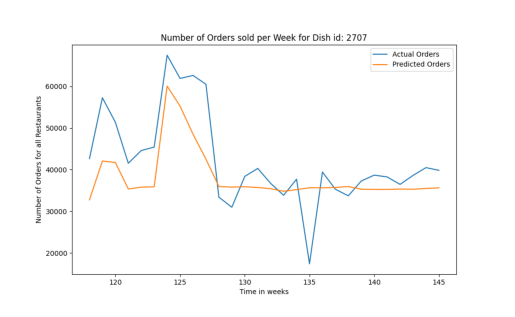

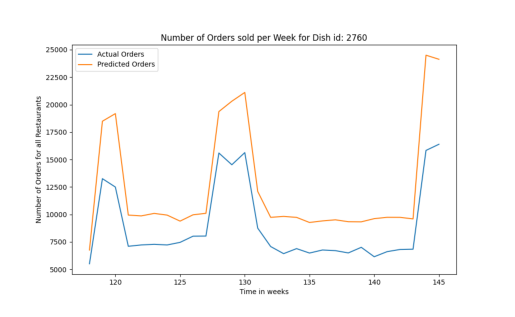

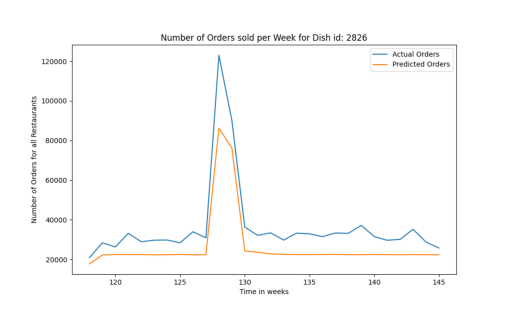

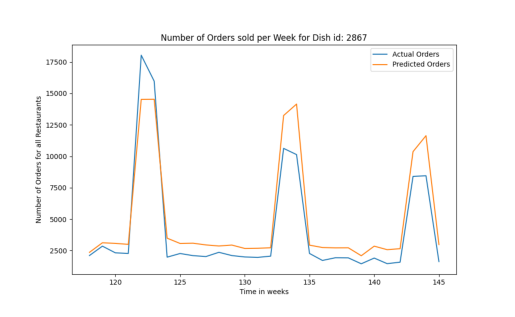

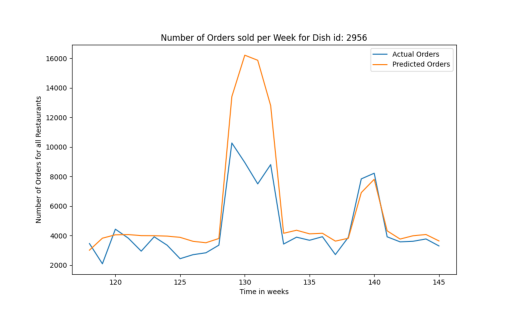


******************************************************

Graph generated using the  RandomForestRegressor()


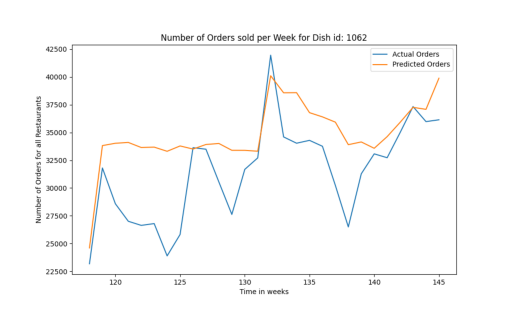

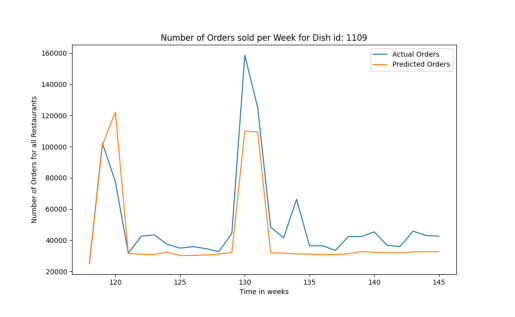

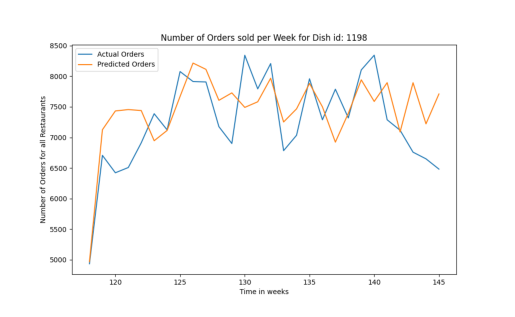

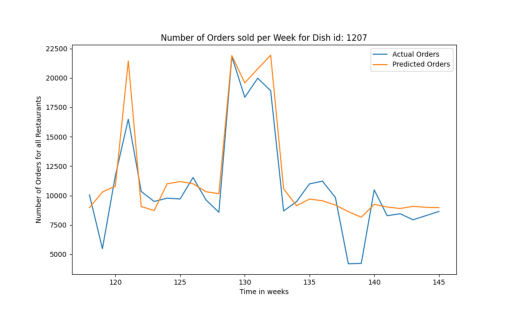

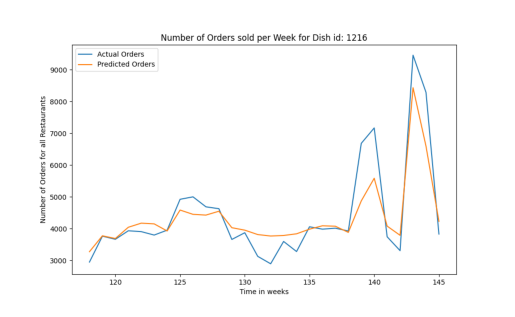

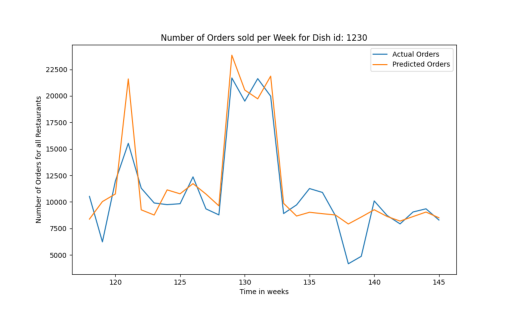

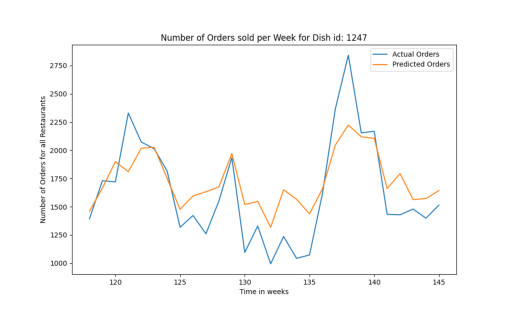

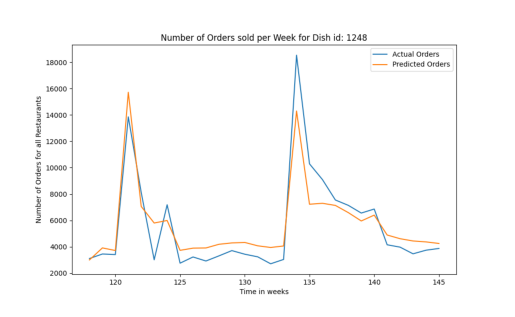

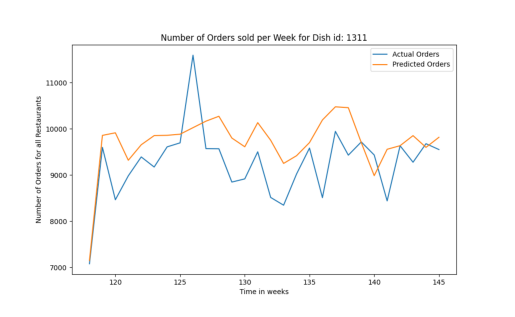

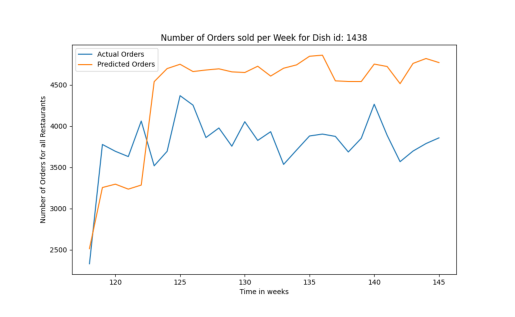

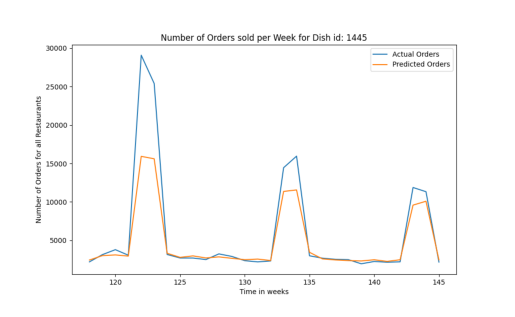

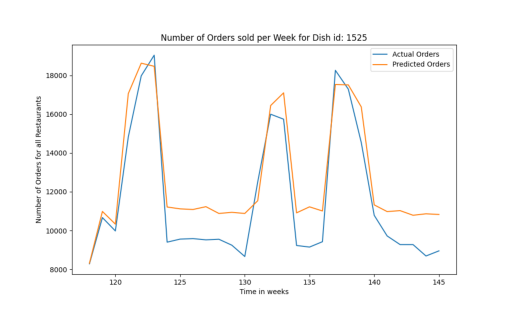

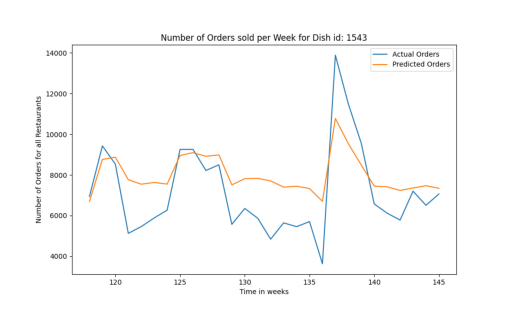

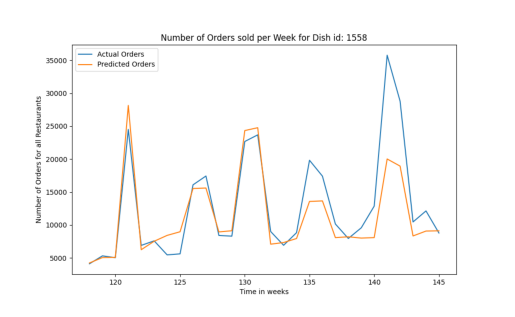

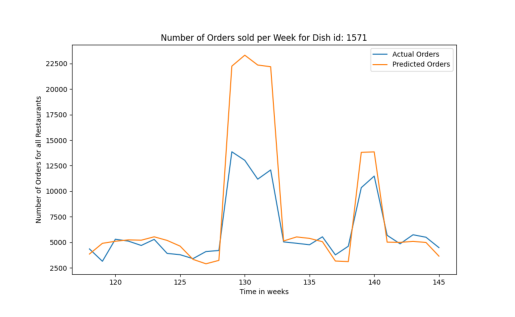

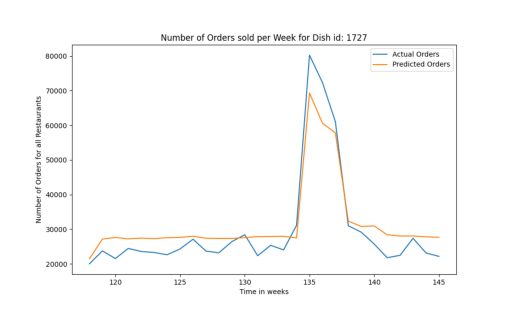

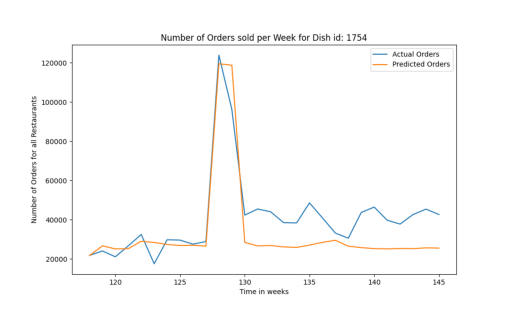

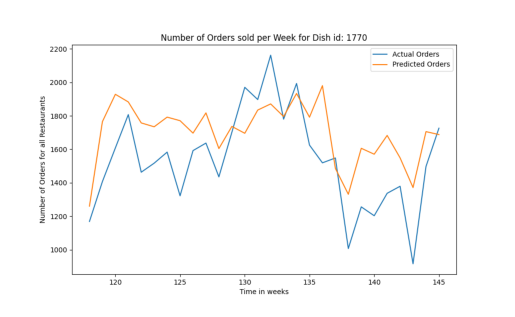

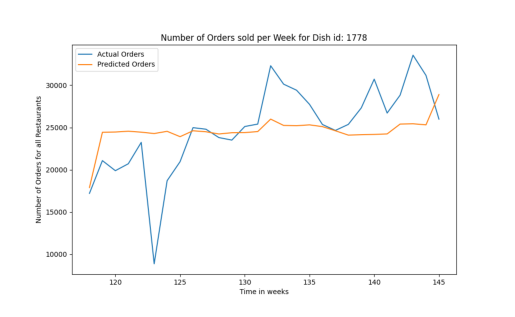

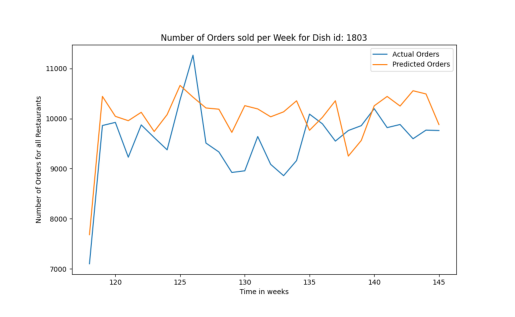

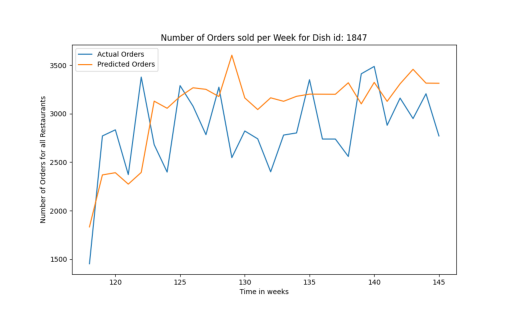

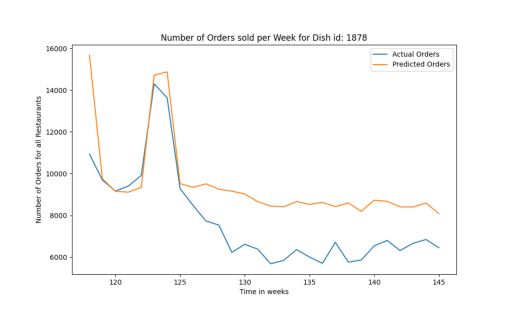

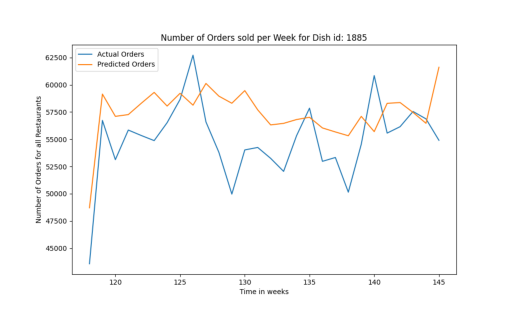

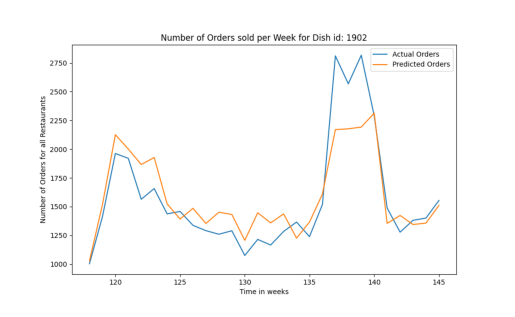

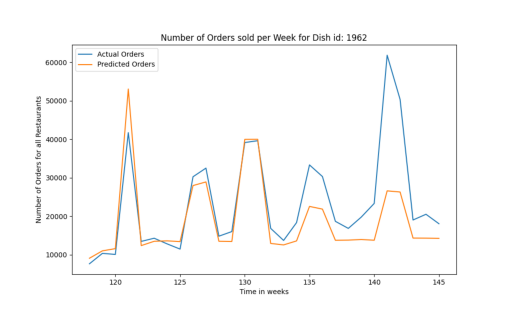

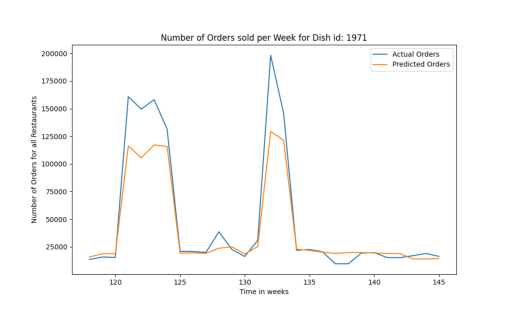

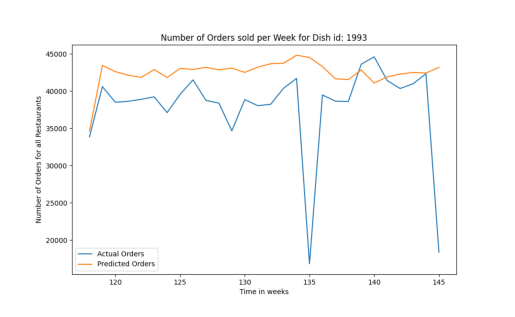

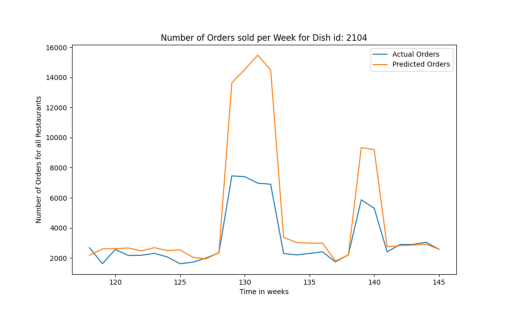

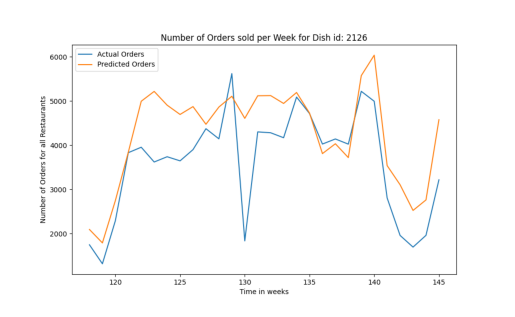

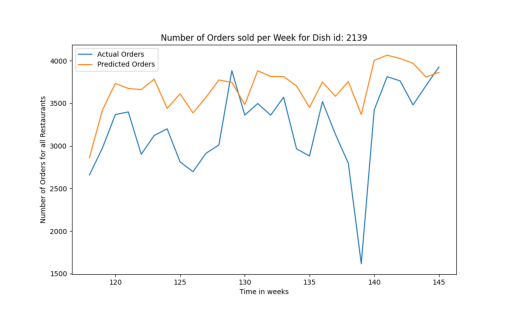

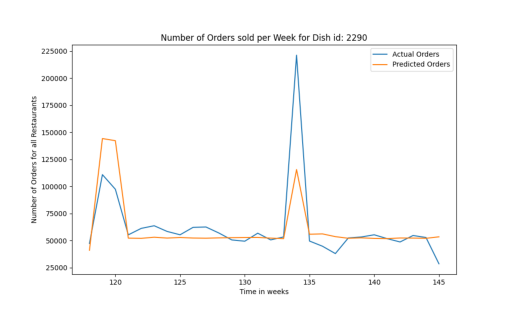

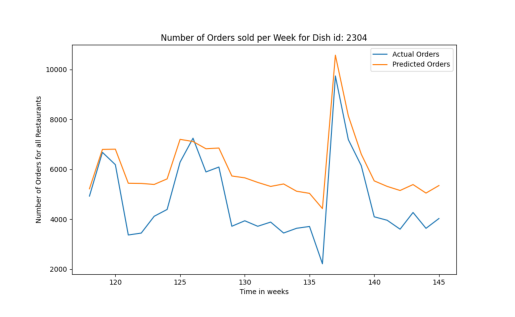

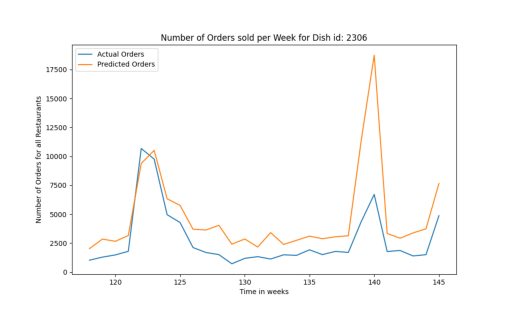

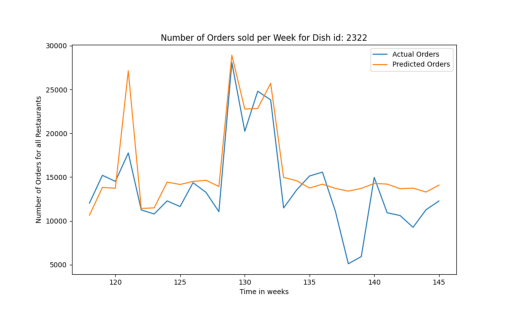

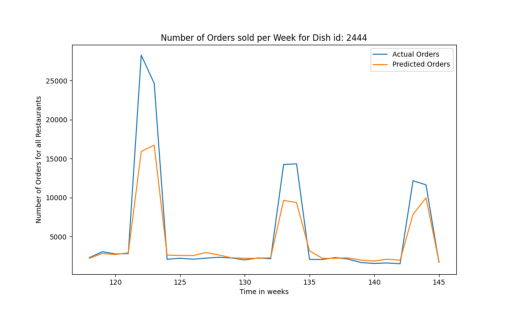

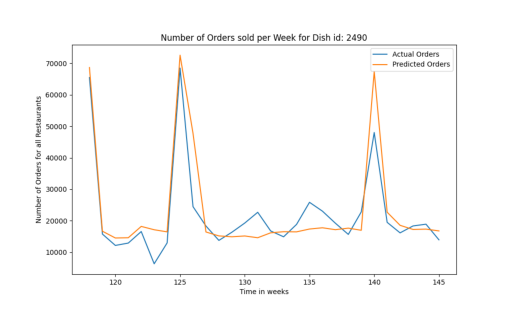

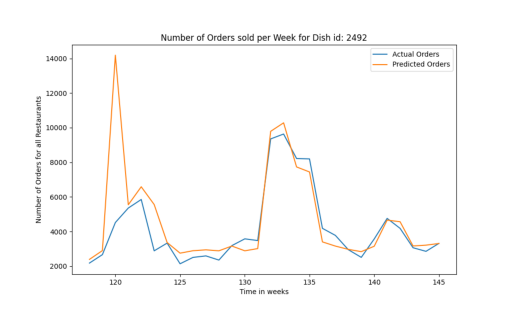

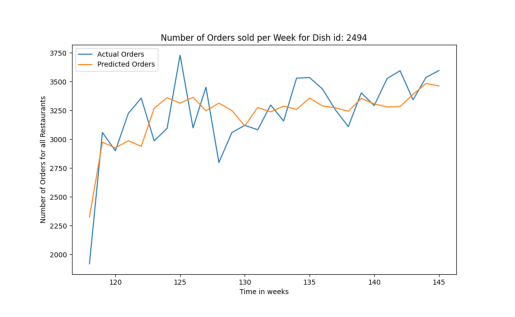

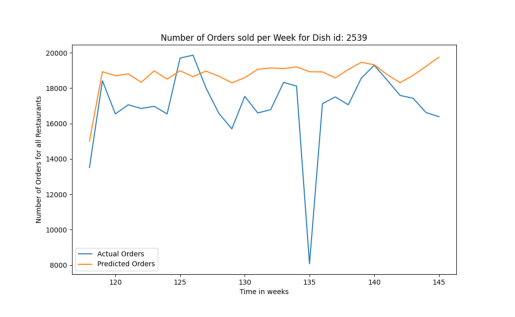

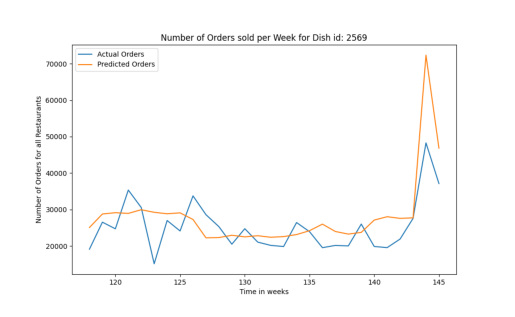

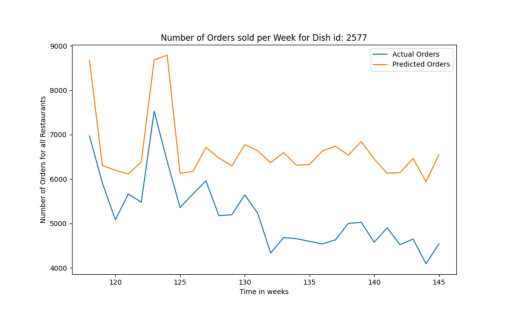

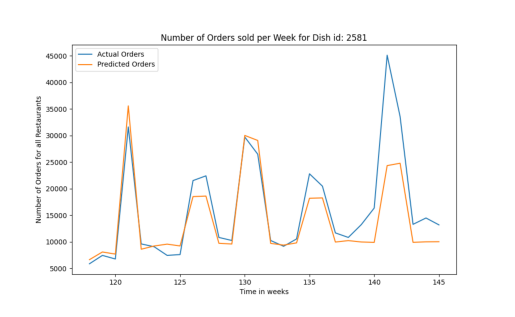

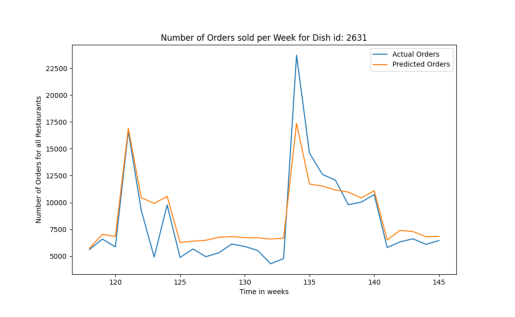

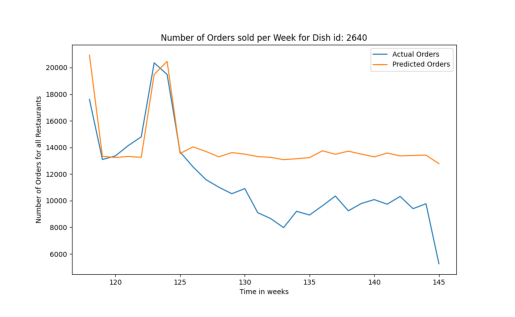

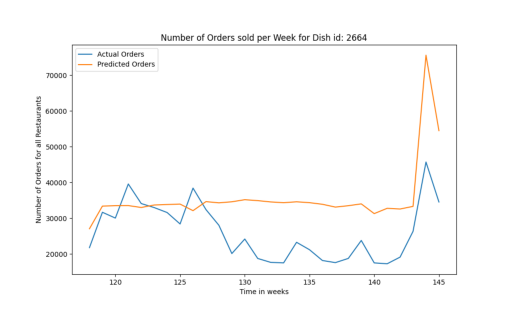

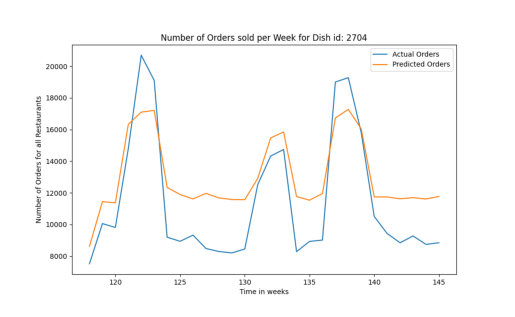

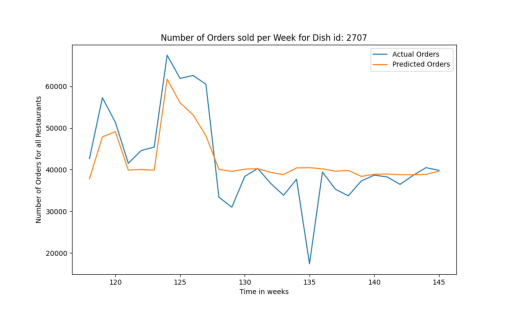

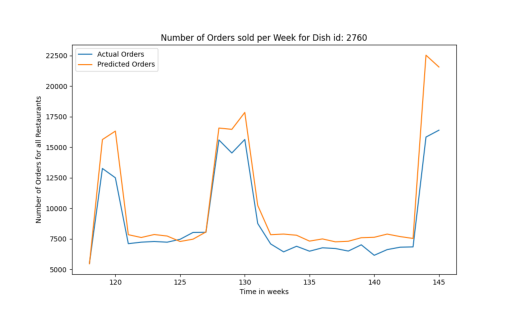

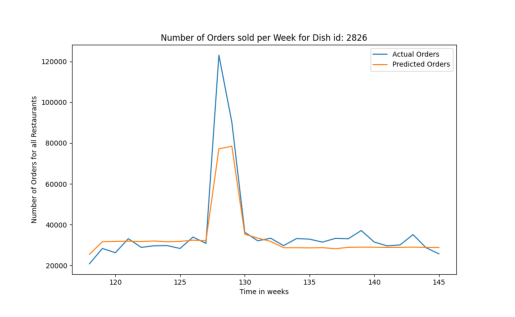

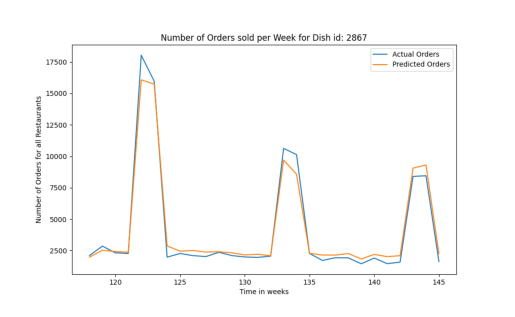

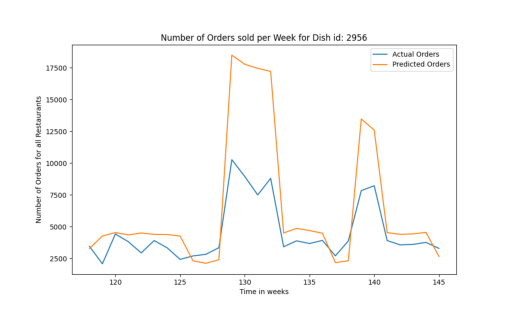


******************************************************



In [91]:
folderList = [("HGB", m6),
              ("GB", m5),
              ("RF",m1)]


for folder, model in folderList:
    print("Graph generated using the ",model)
    generateAndSaveGraphs(folder, model, X_test=X_t,Y_test=Y_t, dish_id=dish_id)
    print("\n******************************************************\n")

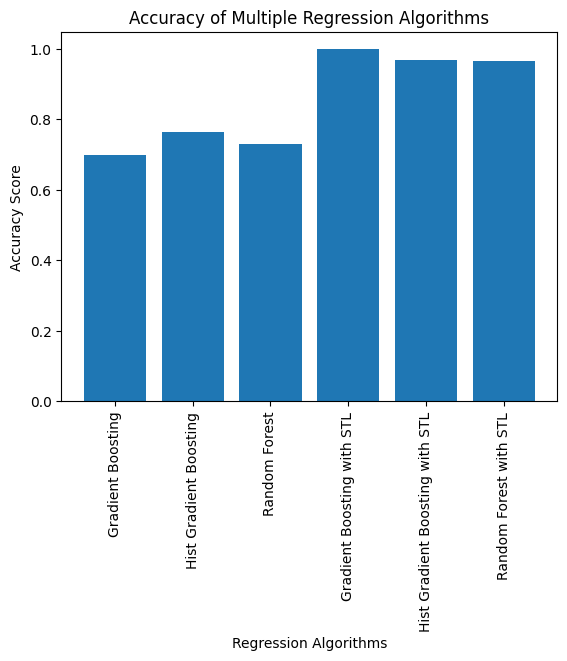

In [104]:
import matplotlib.pyplot as plt

# Sample data
regression_algorithms = ['Gradient Boosting',
                         'Hist Gradient Boosting',
                         'Random Forest',
                         'Gradient Boosting with STL',
                         'Hist Gradient Boosting with STL',
                         'Random Forest with STL'
                        ]
accuracy_scores = [ m5.score(X_t,Y_t),
                    m6.score(X_t,Y_t),
                    m1.score(X_t,Y_t),
                    getModel('gradient_boosting').score(X_te,Y_te),
                    getModel('hist_gradient_boosting').score(X_te,Y_te),
                    getModel('random_forest').score(X_te,Y_te)
                ]

# Create bar plot
plt.bar(regression_algorithms, accuracy_scores)

# Set labels and title
plt.xlabel('Regression Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Multiple Regression Algorithms')

plt.xticks(rotation='vertical')
plt.savefig('Acc_bar_plot.png', bbox_inches='tight')
# Show the plot
plt.show()


In [98]:
def modelSummary(model, X_test, Y_test):
    
    r2 = model.score(X_test, Y_test)
    
    Y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(Y_test, Y_pred)
    
    mse = mean_squared_error(Y_test, Y_pred)
    
    rmse = mse**0.5
    
    print("Model : ",model,"\nMAE : ", mae,"\nMSE :", mse,"\nRMSE :",rmse,"\nr2 score :",r2 , "\nAccuaracy :", r2*100,"%")

In [101]:
modelSummary(m1, X_t, Y_t)

Model :  RandomForestRegressor() 
MAE :  88.1422557222648 
MSE : 36079.367788981486 
RMSE : 189.9456969477895 
r2 score : 0.7306984526752557 
Accuaracy : 73.06984526752557 %


In [105]:
modelSummary(m5, X_t, Y_t)

Model :  GradientBoostingRegressor(max_depth=5, min_samples_leaf=5) 
MAE :  102.27335263126687 
MSE : 40131.511851985975 
RMSE : 200.3285098331887 
r2 score : 0.7004526714151098 
Accuaracy : 70.04526714151098 %


In [103]:
modelSummary(m6, X_t, Y_t)

Model :  HistGradientBoostingRegressor(max_iter=600, max_leaf_nodes=250) 
MAE :  82.61466420227168 
MSE : 31611.481001788237 
RMSE : 177.796178254169 
r2 score : 0.7640473969278314 
Accuaracy : 76.40473969278314 %


In [1]:
import requests
from bs4 import BeautifulSoup
import re

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from statistics import mean

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback

class PrintDot(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('.', end='')

# Read the data
data = pd.read_csv("..\..\Database\mainData.csv")

# Split the data into features and target variable
X = data.drop("Num Orders", axis=1)
y = data["Num Orders"]

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define custom callback to print dots
print_dot_callback = PrintDot()

# Determine the modified batch size
batch_size = 16
n_samples = X_train.shape[0]
remainder = n_samples % batch_size
if remainder != 0:
    n_batches = n_samples // batch_size
    n_samples = n_batches * batch_size
    X_train = X_train[:n_samples]
    y_train = y_train[:n_samples]

# Fit the model to the training data with early stopping and print dots
history = model.fit(X_train, y_train, epochs= 100, batch_size=batch_size, validation_split=0.2, verbose=0,
                    callbacks=[early_stopping, print_dot_callback])

# Make predictions on the test data
y_pred = model.predict(X_test)

# Reshape the predictions
y_pred = y_pred.reshape(y_pred.shape[0])

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

........


KeyboardInterrupt



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor
import joblib
import os
import io
import base64

In [4]:
saleDf = pd.read_csv(r"..\..\DataSet\Dish Sales dataset\sales_info.csv")
dishDf = pd.read_csv(r"..\..\DataSet\Dish Sales dataset\meal_info.csv")
centerDf = pd.read_csv(r"..\..\DataSet\Dish Sales dataset\fulfilment_center_info.csv")

In [5]:
le = LabelEncoder()
encData = {}
sales = saleDf.merge(centerDf, left_on='Center Id', right_on='Center Id', how= "left")
sales = sales.merge(dishDf, left_on='Dish Id', right_on='Dish Id', how= "left")
col = ["Category", "Cuisine","Center Type"]
for column in col:
    enc = sales[column].unique()
    enc1 = list(set(le.fit_transform(sales[column])))
    for name, data in zip(enc,enc1):
        encData[name] = data

In [6]:
def preprocessModule1(df):
    
    df['Week'] = df['Week'].astype('int64')
    df['Center Id'] = df['Center Id'].astype('int64')
    df['Dish Id'] = df['Dish Id'].astype('int64')
    df['Checkout Price'] = df['Checkout Price'].astype('float64')
    df['Base Price'] = df['Base Price'].astype('float64')
    df['Emailer For Promotion'] = df['Emailer For Promotion'].astype('int64')
    df['Homepage Featured'] = df['Homepage Featured'].astype('int64')

    #Remove unnecessary fields
    if "id" in list(df.columns):
        df = df.drop(['id'], axis=1) 
        
    if "Num Orders" in list(df.columns):
        df = df.drop(['Num Orders'], axis=1) 

    #Merging of dataframes
    df = df.merge(dishDf, left_on='Dish Id', right_on='Dish Id', how= "left")
    df = df.merge(centerDf, left_on='Center Id', right_on='Center Id', how= "left")

    #Encoding the record
    for name, data in encData.items():
        df = df.replace(name,data)

        
    return df

In [63]:
def preprocessSTL(df):
    
    tempData = df
    
    tempData["Trend"] = np.nan
    tempData["Seasonal"] = np.nan
    tempData["Residual"] = np.nan
    
    tempData = pd.concat([X_train, tempData], axis = 0)
    
    tempData = performImputation(tempData)
    
    return tempData.tail(len(df))

In [8]:
def numOrderPredictor(dat, model):
    numOrder = int(abs(model.predict(dat)))
    return numOrder

In [9]:
def quantityCalculator(dat, numOrder, inventory, ar):
    dId = list(dat["Dish Id"])[0]
    ing = ar[ar["Dish Id"] == dId]

    for i in ing.index:
        d = ar.iloc[ar.index == i]
        q = list(d["Quantity"])[0]
        n = list(d["Ingredient Name"])[0]
        u = list(d["Unit"])[0]
        nu = list(inventory[(inventory["Ingredient Name"] ==  n) & (inventory["Unit"] ==  u)]["Quantity"])[0]
        inventory[(inventory["Ingredient Name"] ==  n) & (inventory["Unit"] ==  u)] = inventory[(inventory["Ingredient Name"] ==  n) & (inventory["Unit"] ==  u)].replace(nu, nu + q*numOrder)

In [10]:
def quantityConverter(inventory,vm,rb):
    ind = 0
    for i in vm.index:
        dat = vm.iloc[rb.index == i]
        eq = list(dat["Equivalent Quantity"])[0]
        n = list(dat["Ingredient Name"])[0]
        u = list(dat["Unit"])[0]
        q = inventory._get_value(ind,'Quantity')
        ind += 1
        rb[(rb["Ingredient Name"] ==  n) & (rb["Unit"] ==  u)] = rb[(rb["Ingredient Name"] ==  n) & (rb["Unit"] ==  u)].replace(1, eq*q)
    rb = rb.drop(["Equivalent Quantity", "Unit"], axis = 1)
    rawMaterial = rb.groupby(['Ingredient Name', "C_unit"])['Quantity'].sum()
    rawMaterial = rawMaterial.to_frame()
    return rb

In [11]:
def rawMaterialQuantityIdentifier(dummy, model):
    
    ar = pd.read_csv(r"..\..\Database\allRecipe.csv")
    ar = ar.sort_values(by = "Ingredient Name")
    vm = pd.read_csv(r"..\..\Database\vMeasurement.csv")
    inventory =  pd.read_csv(r"..\..\Database\inventory.csv")
    rb = vm
    
    dum = preprocessModule1(dummy)
    print("done 1")
    dummy = preprocessSTL(dum)
    print(" done 2")
    
    
    for i in dummy.index:
        numOrder = numOrderPredictor(dummy.iloc[dummy.index == i], model)
        quantityCalculator(dummy.iloc[dummy.index == i], numOrder, inventory, ar)
    print(" done 3")
    rawMaterial = quantityConverter(inventory, vm, rb)
        
    return rawMaterial[rawMaterial["Quantity"] != 0]

In [12]:
def inputData(df, model):
    
    data = rawMaterialQuantityIdentifier(df, model) 
    return data

In [13]:
data = pd.read_csv("..\..\Database\mainData.csv")

In [14]:
def stlDecomposition(data, target_column, period):
    
    result = seasonal_decompose(data[target_column], model='additive', period = period)

    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    data_stl = pd.concat([trend, seasonal, residual], axis=1)
    data_stl.columns = ["Trend", "Seasonal", "Residual"]
    data_stl = pd.concat([data, data_stl], axis=1)

    return data_stl

In [15]:
def performImputation(X):
    
    imputer = IterativeImputer(estimator= HistGradientBoostingRegressor(max_iter=100, max_depth=5, min_samples_leaf=5))
    X_filled = imputer.fit_transform(X)
    X_imputed = pd.DataFrame(X_filled, columns = X.columns)

    return X_imputed

In [16]:
def fitModel(model, X_train, y_train):
    
    return model.fit(X_train, y_train)

In [17]:
def trainModel(X_train, Y_train):
    
    gb = fitModel(GradientBoostingRegressor(n_estimators=100,
                                            max_depth=5,
                                            min_samples_leaf=5,
                                            learning_rate=0.1),
                  X_train,
                  Y_train)
    hgb = fitModel(HistGradientBoostingRegressor(max_iter=100,
                                                 max_depth=5,
                                                 min_samples_leaf=5),
                   X_train,
                   Y_train)
    rf = fitModel(RandomForestRegressor(n_estimators=100,
                                        max_depth=5,
                                        min_samples_leaf=5),
                  X_train,
                  Y_train)
    
    return gb, hgb, rf

In [18]:
data_stl = stlDecomposition(data, "Num Orders", period=7)
X = data_stl.drop("Num Orders", axis=1)
Y = data_stl["Num Orders"]
X_imputed = performImputation(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42, shuffle=False)
gb, hgb, rf = trainModel(X_train, Y_train)

In [19]:
def storePKL(gb, hgb, rf):
    pkl_dir = os.path.abspath('PKL')
    
    if not os.path.exists(pkl_dir):
        os.makedirs(pkl_dir)

    gb_path = os.path.join(pkl_dir, 'gb.pkl')
    hgb_path = os.path.join(pkl_dir, 'hgb.pkl')
    rf_path = os.path.join(pkl_dir, 'rf.pkl')

    joblib.dump(gb, gb_path)
    joblib.dump(hgb, hgb_path)
    joblib.dump(rf, rf_path)

In [20]:
storePKL(gb, hgb, rf)

In [21]:
def getModel(model_name):
    
    pkl_dir = os.path.abspath('PKL')
    model_path = ""
    
    if model_name == "gradient_boosting":
        model_path = os.path.join(pkl_dir, 'gb.pkl')
    elif model_name == "random_forest":
        model_path = os.path.join(pkl_dir, 'rf.pkl')
    elif model_name == "hist_gradient_boosting":
        model_path = os.path.join(pkl_dir, 'hgb.pkl')
    else:
        print(f"Invalid model name: {model_name}")

    model = joblib.load(model_path)
    #model = joblib.load('hgb.pkl')

    return model

In [22]:
def runModel(model_name, X_test):

    model = getModel(model_name)
    Y_pred = model.predict(X_test)
    
    return model, Y_pred

In [23]:
import time
def timeTaken(model_name, X_test):
    start_time = time.time()
    
    model, Y_pred = runModel(model_name, X_test)
    
    r2 = r2_score(Y_test, Y_pred)
    print("R-squared score:", r2)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Time consumed by the ",model," Model is :" ,elapsed_time, "seconds")

In [24]:
timeTaken('gradient_boosting', X_test)

R-squared score: 0.9985984304654523
Time consumed by the  GradientBoostingRegressor(max_depth=5, min_samples_leaf=5)  Model is : 0.15091538429260254 seconds


In [25]:
tempData = X_test.sample()
tempData

Week  Center Id  Dish Id  Checkout Price  Base Price   
398126  128.0       97.0   1727.0          447.23      445.23  \

        Emailer For Promotion  Homepage Featured  Category  Cuisine   
398126                    0.0                0.0       1.0      1.0  \

        Recipe Id  City Code  Region Code  Center Type  Op Area       Trend   
398126     3882.0      628.0         77.0          2.0      4.6  318.285714  \

        Seasonal  Residual  
398126  0.830421  5.883865

In [26]:
Y[Y.index ==tempData.index[0]]

398126    325
Name: Num Orders, dtype: int64

In [27]:
model = getModel('hist_gradient_boosting')
no1 = int(model.predict(tempData)[0])
print("We have Predicted ",no1," orders using ",model," algorithm for the dish id ",list(tempData["Dish Id"])[0])

We have Predicted  329  orders using  HistGradientBoostingRegressor(max_depth=5, min_samples_leaf=5)  algorithm for the dish id  1727.0


In [28]:
........................

SyntaxError: invalid syntax (2188048775.py, line 1)

In [ ]:
def createGraphFolder():
    current_dir = os.getcwd()

    graph_dir = os.path.join(current_dir, 'graph')
    if not os.path.exists(graph_dir):
        os.makedirs(graph_dir)

In [ ]:
createGraphFolder()

In [ ]:
def saveGraph(dish_id, img_string):
    graph_dir = 'graph'
    if not os.path.exists(graph_dir):
        os.makedirs(graph_dir)
    
    graph_path = os.path.join(graph_dir, f'{dish_id}.png')
    
    img_data = base64.b64decode(img_string)
    
    with open(graph_path, 'wb') as f:
        f.write(img_data)
    
    img = plt.imread(graph_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
def generateAndSaveGraphs(model, X_test, data_stl, dish_id):
    if 'Num Orders' in X_test.columns:
        X_test = X_test.drop(['Num Orders'], axis=1)

    if 'Y_pred' in X_test.columns:
        X_test = X_test.drop(['Y_pred'], axis=1)

    Y_pred = model.predict(X_test)

    df1 = X_test
    df1["Y_pred"] = Y_pred

    df2 = X_test
    df2["Num Orders"] = Y_test

    for i in dish_id:
        
        tempD1 = df1[df1["Dish Id"] == i]
        tempD2 = df2[df2["Dish Id"] == i]

        tempD1 = tempD1.groupby("Week").sum()
        tempD2 = tempD2.groupby("Week").sum()

        plt.figure(figsize=(10, 6))
        plt.plot(tempD2["Num Orders"].index, tempD2["Num Orders"], label='Actual Orders')
        plt.plot(tempD1["Y_pred"].index, tempD1["Y_pred"], label='Predicted Orders')

        plt.xlabel('Time in weeks')
        plt.ylabel('Number of Orders for all Restaurants')
        plt.title(f'Number of Orders sold per Week for Dish id: {i}')
        plt.legend()

        img_buffer = io.BytesIO()
        plt.savefig(img_buffer, format='png')
        img_buffer.seek(0)
        img_string = base64.b64encode(img_buffer.getvalue()).decode()
        
        plt.close()
        
        saveGraph(i, img_string)

In [ ]:
import os
import base64
import io
import matplotlib.pyplot as plt

def saveGraph(dish_id, graph_path, img_string):
    img_data = base64.b64decode(img_string)
    
    with open(graph_path, 'wb') as f:
        f.write(img_data)
    
    img = plt.imread(graph_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:

def generateAndSaveGraphs(folder_name, model, X_test, Y_test, dish_id):
    graph_dir = os.path.join('graph', folder_name)
    if not os.path.exists(graph_dir):
        os.makedirs(graph_dir)

    if 'Num Orders' in X_test.columns:
        X_test = X_test.drop(['Num Orders'], axis=1)

    if 'Y_pred' in X_test.columns:
        X_test = X_test.drop(['Y_pred'], axis=1)

    Y_pred = model.predict(X_test)

    df1 = X_test.copy()
    df1["Y_pred"] = Y_pred

    df2 = X_test.copy()
    df2["Num Orders"] = Y_test

    for i in dish_id:
        tempD1 = df1[df1["Dish Id"] == i]
        tempD2 = df2[df2["Dish Id"] == i]

        tempD1 = tempD1.groupby("Week").sum()
        tempD2 = tempD2.groupby("Week").sum()

        plt.figure(figsize=(10, 6))
        plt.plot(tempD2["Num Orders"].index, tempD2["Num Orders"], label='Actual Orders')
        plt.plot(tempD1["Y_pred"].index, tempD1["Y_pred"], label='Predicted Orders')

        plt.xlabel('Time in weeks')
        plt.ylabel('Number of Orders for all Restaurants')
        plt.title(f'Number of Orders sold per Week for Dish id: {i}')
        plt.legend()

        img_buffer = io.BytesIO()
        plt.savefig(img_buffer, format='png')
        img_buffer.seek(0)
        img_string = base64.b64encode(img_buffer.getvalue()).decode()
        plt.close()

        graph_path = os.path.join(graph_dir, f'{i}.png')
        saveGraph(i, graph_path, img_string)


In [ ]:
generateAndSaveGraphs('HGB STL', getModel('hist_gradient_boosting'),X_test,Y_test, dish_id)

In [ ]:
generateAndSaveGraphs('GB STL', getModel('gradient_boosting'),X_test,Y_test, dish_id)

In [ ]:
generateAndSaveGraphs('RF STL', getModel('random_forest'),X_test,Y_test, dish_id)

In [ ]:
folderList = [("HGB STL", getModel("hist_gradient_boosting")),
              ("GB STL", getModel("gradient_boosting")),
              ("RF STL",getModel("random_forest"))]

In [ ]:
for folder, model in folderList:
    print("Graph generated using the ",model)
    generateAndSaveGraphs(folder, model, X_test=X_test,Y_test=Y_test, dish_id=dish_id)
    print("\n******************************************************\n")

In [29]:
center_id = data['Center Id'].unique()
center_id = np.sort(center_id)
center_id = list(center_id)

In [30]:
dish_id = data['Dish Id'].unique()
dish_id = np.sort(dish_id)
dish_id = list(dish_id)

In [ ]:
def createGraphFolder(folder_names):
    current_dir = os.getcwd()
    graph_dir = os.path.join(current_dir, 'graph')
    
    if not os.path.exists(graph_dir):
        os.makedirs(graph_dir)
    
    for name in folder_names:
        folder_path = os.path.join(graph_dir, name)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)


In [ ]:
folder_names = ['HGB STL', 'GB STL', 'RF STL', 'HGB', 'GB', 'RF']

In [ ]:
createGraphFolder(folder_names)

In [ ]:
generateAndSaveGraphs(getModel('gradient_boosting'), X_test, data_stl, dish_id)

In [ ]:
sample = X_test.drop(['Y_pred', 'Num Orders'], axis=1)

In [ ]:
saleDf = pd.read_csv(r"..\..\DataSet\Dish Sales dataset\sales_info.csv")
tempData2 = saleDf.sample()
tempData2

In [ ]:
A = inputData(tempData2,model)
A

In [31]:
from flask import Flask, render_template, request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import base64

In [33]:
from flask import Flask, render_template, request
import pandas as pd
import joblib

#model = joblib.load('hgb.pkl')

app = Flask(__name__)
app.config['SECRET_KEY'] = 'mysecretkey'

# Initialize an empty DataFrame to store inputs
df_inputs = pd.DataFrame(columns=['Week', 'Center Id', 'Dish Id', 'Checkout Price', 'Base Price', 'Emailer For Promotion', 'Homepage Featured'])

df_output = pd.DataFrame(columns=['Ingredient Name', 'Quantity', 'C_unit'])

@app.route('/', methods=['GET', 'POST'])
def index():
    global df_output
    global df_inputs
    
    model_name = ''
    empty_fields = {}  # Initialize empty_fields variable outside the if block
    show_loader = False
    
    if request.method == 'POST':
        if 'addItem' in request.form:
            # Get the input values from the form
            week = request.form['week']
            centerId = request.form['center_id']
            dishId = request.form['dish_id']
            checkoutPrice = request.form['checkout_price']
            basePrice = request.form['base_price']
            emailerForPromotion = request.form['email_for_promotion']
            homepageFeatured = request.form['homepage_featured']
            
            empty_fields = {}
            mod = {}
            # Check if any field is empty
            if not week:
                empty_fields['week'] = True
            if not centerId:
                empty_fields['center_id'] = True
            if not dishId:
                empty_fields['dish_id'] = True
            if not checkoutPrice:
                empty_fields['checkout_price'] = True
            if not basePrice:
                empty_fields['base_price'] = True
            if not emailerForPromotion:
                empty_fields['email_for_promotion'] = True
            if not homepageFeatured:
                empty_fields['homepage_featured'] = True
            
            # Append the input values to the DataFrame if all fields are filled
            if not empty_fields:
                df_inputs.loc[len(df_inputs)] = [week,
                                                 centerId,
                                                 dishId,
                                                 checkoutPrice,
                                                 basePrice,
                                                 emailerForPromotion,
                                                 homepageFeatured]
        
        elif 'deleteItem' in request.form:
            index = int(request.form['deleteItem'])
            if 0 <= index < len(df_inputs):
                df_inputs = df_inputs.drop(index)
                
        elif 'submit' in request.form:

            
            if len(df_inputs) != 0:
                show_loader = True  # Set show_loader to True
                # Load the model based on the selected model name
                model_name = request.form.get('model')
                print(model_name)
            
                model = getModel('hist_gradient_boosting')
                
                if model is not None:
                    df_output = inputData(df_inputs, model)
                
                else:
                    print("Model is none")
                
                show_loader = False  # Set show_loader back to False after calculation is done
                
                
                
    else:
        empty_fields = {}
    
    # Get the list of dropdown options
    dropdown_options_center_id = center_id  # Dropdown options for Center Id
    dropdown_options_dish_id = dish_id  # Dropdown options for Dish Id
   
    # Pass the dropdown options to the template
    return render_template('index.html',
                           empty_fields=empty_fields,
                           dropdown_options_center_id=dropdown_options_center_id,
                           dropdown_options_dish_id=dropdown_options_dish_id,
                           df_inputs=df_inputs.iterrows(),
                           df_output=df_output.to_dict('records'),
                           show_loader=show_loader)


if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [15/Jun/2023 18:50:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 18:50:18] "GET /static/main.css HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 18:50:36] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 18:50:36] "GET /static/main.css HTTP/1.1" 304 -


None
done 1
None
done 1
 done 2
 done 3


127.0.0.1 - - [15/Jun/2023 18:52:09] "POST / HTTP/1.1" 200 -


 done 2
 done 3


127.0.0.1 - - [15/Jun/2023 18:52:10] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 18:52:10] "GET /static/main.css HTTP/1.1" 304 -


In [65]:
df_output

Empty DataFrame
Columns: [Ingredient Name, Quantity, C_unit]
Index: []

In [ ]:
from flask import Flask, render_template, request
import pandas as pd
import joblib

model = joblib.load('hgb.pkl')

app = Flask(__name__)
app.config['SECRET_KEY'] = 'mysecretkey'

# Initialize an empty DataFrame to store inputs
df_inputs = pd.DataFrame(columns=['Week', 'Center Id', 'Dish Id', 'Checkout Price', 'Base Price', 'Emailer For Promotion', 'Homepage Featured'])

df_output = pd.DataFrame(columns=['Ingredient Name', 'Quantity', 'C_unit'])

@app.route('/', methods=['GET', 'POST'])
def index():
    global df_output
    global df_inputs
    
    empty_fields = {}  # Initialize empty_fields variable outside the if block
    
    if request.method == 'POST':
        if 'addItem' in request.form:
            # Get the input values from the form
            week = request.form['week']
            centerId = request.form['center_id']
            dishId = request.form['dish_id']
            checkoutPrice = request.form['checkout_price']
            basePrice = request.form['base_price']
            emailerForPromotion = request.form['email_for_promotion']
            homepageFeatured = request.form['homepage_featured']
            
            empty_fields = {}
            
            # Check if any field is empty
            if not week:
                empty_fields['week'] = True
            if not centerId:
                empty_fields['center_id'] = True
            if not dishId:
                empty_fields['dish_id'] = True
            if not checkoutPrice:
                empty_fields['checkout_price'] = True
            if not basePrice:
                empty_fields['base_price'] = True
            if not emailerForPromotion:
                empty_fields['email_for_promotion'] = True
            if not homepageFeatured:
                empty_fields['homepage_featured'] = True
            
            # Append the input values to the DataFrame if all fields are filled
            if not empty_fields:
                df_inputs.loc[len(df_inputs)] = [int(week),
                                                 int(centerId),
                                                 int(dishId),
                                                 float(checkoutPrice),
                                                 float(basePrice),
                                                 int(emailerForPromotion),
                                                 int(homepageFeatured)]
        
        elif 'deleteItem' in request.form:
            index = int(request.form['deleteItem'])
            if 0 <= index < len(df_inputs):
                df_inputs = df_inputs.drop(index)
                
        elif 'submit' in request.form:
            if len(df_inputs) != 0:
                df_output = inputData(df_inputs, model)
                
                
    else:
        empty_fields = {}

    
    # Get the list of dropdown options
    dropdown_options_center_id = center_id  # Dropdown options for Center Id
    dropdown_options_dish_id = dish_id  # Dropdown options for Dish Id
    
    return render_template('index.html',
                       empty_fields=empty_fields,
                       dropdown_options_center_id=dropdown_options_center_id,
                       dropdown_options_dish_id=dropdown_options_dish_id,
                       df_inputs=df_inputs.iterrows(),
                       df_output=df_output.to_dict('records'))

if __name__ == '__main__':
    app.run()


In [ ]:
<!DOCTYPE html>
<html>
<head>
    <title>Restaurant App</title>
    <link rel="stylesheet" type="text/css" href="{{ url_for('static', filename='main.css') }}">
</head>
<body>
    <h1>Restaurants App</h1>
    
    <div style="display: flex;">
        <div style="width: 30%; padding-right: 20px;" class="container">
            <h2>Input Form</h2>
            
            <form method="POST">
                <label for="week">Week:</label>
                <input type="number" id="week" name="week" value="{{ empty_fields.week }}" min="1" required>
                {% if 'week' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
               
                <label for="center_id">Center Id:</label>
                <select id="center_id" name="center_id" required>
                    <option value="" {% if empty_fields.center_id %}selected{% endif %}></option>
                    {% for option in dropdown_options_center_id %}
                        <option value="{{ option }}" {% if option == empty_fields.center_id %}selected{% endif %}>{{ option }}</option>
                    {% endfor %}
                </select>
                {% if 'center_id' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
                
                <label for="dish_id">Dish Id:</label>
                <select id="dish_id" name="dish_id" required>
                    <option value="" {% if empty_fields.dish_id %}selected{% endif %}></option>
                    {% for option in dropdown_options_dish_id %}
                        <option value="{{ option }}" {% if option == empty_fields.dish_id %}selected{% endif %}>{{ option }}</option>
                    {% endfor %}
                </select>
                {% if 'dish_id' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
                
                <label for="checkout_price">Checkout Price:</label>
                <input type="number" step="0.01" id="checkout_price" name="checkout_price" value="{{ empty_fields.checkout_price }}" min="0" required>
                {% if 'checkout_price' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
                
                <label for="base_price">Base Price:</label>
                <input type="number" step="0.01" id="base_price" name="base_price" value="{{ empty_fields.base_price }}" min="0" required>
                {% if 'base_price' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
                
                <label>Emailer For Promotion:</label>
                <br><br>
                <input type="radio" id="radio_yes" name="email_for_promotion" value="1" {% if empty_fields.email_for_promotion == '1' %}checked{% endif %}>
                <label for="radio_yes">Yes</label>
                <br><br>
                <input type="radio" id="radio_no" name="email_for_promotion" value="0" {% if empty_fields.email_for_promotion == '0' %}checked{% endif %}>
                <label for="radio_no">No</label>
                {% if 'email_for_promotion' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
                
                <label>Homepage Featured:</label>
                <br><br>
                <input type="radio" id="radio_featured" name="homepage_featured" value="1" {% if empty_fields.homepage_featured == '1' %}checked{% endif %}>
                <label for="radio_featured">Featured</label>
                <br><br>
                <input type="radio" id="radio_not_featured" name="homepage_featured" value="0" {% if empty_fields.homepage_featured == '0' %}checked{% endif %}>
                <label for="radio_not_featured">Not Featured</label>
                {% if 'homepage_featured' in empty_fields %}
                    <span style="color: red;">The field is empty.</span>
                {% endif %}
                <br><br>
                
                <div style="display: flex; justify-content: space-between;">
                    <input type="submit" name="addItem" value="Add Item">
                </div>
            </form>
        </div>
        
        
        <div style="width: 70%;" class="container">
            <div class="dropdown">
                <h2>Select a Model</h2>
                <select name="model" id="model">
                    <option value="gradient_boosting">Gradient Boosting</option>
                    <option value="random_forest">Random Forest</option>
                    <option value="hist_gradient_boosting">Hist Gradient Boosting</option>
                </select>
            </div>

<div class="table">
                <h2>Input Display</h2>
                {% if df_inputs %}
                    <table>
                        <thead>
                            <tr>
                                <th>Week</th>
                                <th>Center Id</th>
                                <th>Dish Id</th>
                                <th>Checkout Price</th>
                                <th>Base Price</th>
                                <th>Emailer For Promotion</th>
                                <th>Homepage Featured</th>
                                <th>Action</th>
                            </tr>
                        </thead>
                        <tbody>
                            {% for index, row in df_inputs %}
                                <tr>
                                    <td>{{ row['Week'] }}</td>
                                    <td>{{ row['Center Id'] }}</td>
                                    <td>{{ row['Dish Id'] }}</td>
                                    <td>{{ row['Checkout Price'] }}</td>
                                    <td>{{ row['Base Price'] }}</td>
                                    <td>{{ row['Emailer For Promotion'] }}</td>
                                    <td>{{ row['Homepage Featured'] }}</td>
                                    <td>
                                        <form method="POST" action="/">
                                            <input type="hidden" name="deleteItem" value="{{ index }}">
                                            <input type="submit" name="delete" value="Delete">
                                        </form>
                                    </td>
                                </tr>
                            {% endfor %}
                        </tbody>
                    </table>
                {% else %}
                    <p>No inputs found.</p>
                {% endif %}
            </div>            
            <div class="center">
                <form method="POST">
                    <input type="submit" name="submit" value="Submit">
                </form>
            </div>
            <div id="loader" class="loader"></div>
            <div class="output">
                <h2>Output Display</h2>
                <br><br>
                <div class="output-scroll">
                    {% if df_output %}
<table>
  <thead>
    <tr>
      <th>Ingredient Name</th>
      <th>Quantity</th>
      <th>C_unit</th>
    </tr>
  </thead>
  <tbody>
    {% for row in df_output %}
    <tr>
      <td>{{ row['Ingredient Name'] }}</td>
      <td>{{ row['Quantity'] }}</td>
      <td>{{ row['C_unit'] }}</td>
    </tr>
    {% endfor %}
  </tbody>
</table>

                    {% else %}
                        <p>No output yet.</p>
                    {% endif %}
                </div>
            </div>
        </div>
    </div>
</body>
</html>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

data = pd.read_csv("..\..\Database\mainData.csv")

data.set_index('Week', inplace=True)

# Set the 'Date' column as the index
stl = STL(data['Num Orders'], period= 7)  # Assuming annual seasonality (52 weeks)
result = stl.fit()

# Get the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original data and the decomposition components
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(data.index, data['Num Orders'])
plt.title('Original Data')
plt.ylabel('Num Orders')

plt.subplot(4, 1, 2)
plt.plot(trend.index, trend)
plt.title('Trend Component')
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal.index, seasonal)
plt.title('Seasonal Component')
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(residual.index, residual)
plt.title('Residual Component')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

def evaluate_time_series_model(model, X, y, n_splits=5):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    scores = []
    train_losses = []
    val_losses = []

    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        train_loss = mean_absolute_error(y_train, y_pred_train)
        val_loss = mean_absolute_error(y_test, y_pred_test)

        scores.append(val_loss)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return scores, train_losses, val_losses

# Example usage
X = X_imputed.values  # Convert DataFrame to array if X_imputed is a DataFrame
y = Y.values  # Convert Series to array if y is a Series

model = HistGradientBoostingRegressor(max_iter=100,
                                      max_depth=5,
                                      min_samples_leaf=5)
scores, train_losses, val_losses = evaluate_time_series_model(model, X, y)

# Print average score and plot losses
print("Average Validation Loss:", np.mean(scores))
print("Average Training Loss:", np.mean(train_losses))

plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel("Fold")
plt.ylabel("MAE")
plt.title("Model Evaluation")
plt.legend()
plt.show()
